<div style="text-align: center"> 

## Analysis & Visualization
## Machine Learning
### Inma Jiménez

## Índice

1. [Preparación del entorno y análisis del DataSet](#1.-Preparación-del-entorno-y-análisis-del-DataSet)
2. [Examen exploratorio de los datos](#2.-Examen-exploratorio-de-los-datos)
3. [Conclusión](#3.-Conclusión)

### 1. Preparación del entorno y análisis del DataSet

Se importan todas las librerías necesarias:


In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from math import pi

import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

Se importa el csv creado - *data_nba.csv* - con los datos de la API de la NBA extaidos, preparados y limpiados anteriormente

In [17]:
pd.options.display.max_columns = None

data_nba = pd.read_csv('/home/inma/Escritorio/The Bridge/Data_Science_Curso/Clase/Repository_Inma/ML/1. Data/data_nba_ML.csv')
data_nba

,temporada,anio,id_jugador,nombre_jugador,draft_anio,posicion,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total
0,2011-2012,2011.0,201142,Kevin Durant,2007,A,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0
1,2011-2012,2011.0,977,Kobe Bryant,1996,B,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0
2,2011-2012,2011.0,2544,LeBron James,2003,A,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0
3,2011-2012,2011.0,201567,Kevin Love,2008,AP,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0
4,2011-2012,2011.0,201566,Russell Westbrook,2008,B,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,2022-2023,2022.0,1627853,Ryan Arcidiacono,2016,B,1.90,88.5,473,Portland,Trail Blazers,Western,13,0.2,0.0,0.300,0.462,0.077,16.7,0.000,0.077,0.0,0.308,0.077,25.0,0.2,2.8,0.3,0.0,0.3,0.2,0.2,0.2,2,0,0.300,6,1,16.7,0,0,0.0,4,1,25.0,36,3,4,0,4,2,2,3,0.0
5834,2022-2023,2022.0,1631205,Buddy Boeheim,2022,A,1.98,93.0,474,Detroit,Pistons,Eastern,1,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0.0
5835,2022-2023,2022.0,1630577,Julian Champagnie,2022,A,2.01,98.4,475,San Antonio,Spurs,Western,2,0.0,0.0,-0.500,1.000,0.000,0.0,0.000,0.000,0.0,0.500,0.000,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.5,0.0,0,0,-0.500,2,0,0.0,0,0,0.0,1,0,0.0,7,0,0,0,0,0,1,0,0.0
5836,2022-2023,2022.0,1631211,Trevor Keels,2022,B,1.93,100.2,476,New York,Knicks,Eastern,1,0.0,0.0,0.000,1.000,0.000,0.0,0.000,0.000,0.0,1.000,0.000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.000,1,0,0.0,0,0,0.0,1,0,0.0,1,0,1,0,1,0,0,0,0.0


In [18]:
# El DataSet cuenta con 4385 filas y 54 columnas

data_nba.shape

(5838, 54)

In [19]:
# Se vuelve a comprobar si hay valores nulos

data_nba.isnull().sum()

temporada                  0
anio                       0
id_jugador                 0
nombre_jugador             0
draft_anio                 0
posicion                 133
altura                   118
peso_kg                  118
num_ranking                0
ciudad_equipo              0
nombre_equipo              0
conferencia                0
partidos_jugados           0
asistencias_pp             0
tapones_pp                 0
eficiencia_tiro_pp         0
tci_pp                     0
tce_pp                     0
porcentaje_tc_pp           0
tli_pp                     0
tle_pp                     0
porcentaje_tl_pp           0
tti_pp                     0
tte_pp                     0
porcentaje_tt_pp           0
puntos_pp                  0
minutos_pp                 0
reb_def_pp                 0
reb_of_pp                  0
total_rebotes_pp           0
faltas_pp                  0
robos_pp                   0
perdidas_pp                0
asistencias_total          0
tapones_total 

In [20]:
# Hay 15 valores nulos identificados

data_nba.loc[data_nba['posicion'].isnull()]

,temporada,anio,id_jugador,nombre_jugador,draft_anio,posicion,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total
214,2011-2012,2011.0,2246,Mehmet Okur,2002,NaN,NaN,NaN,215,New Jersey,Nets,Eastern,17,1.8,0.2,8.294,8.176,3.059,37.4,0.294,1.353,60.0,4.235,1.353,31.9,7.6,26.7,3.5,1.3,4.8,2.6,0.5,1.4,30,5,8.294,139,52,37.4,5,3,60.0,72,23,31.9,454,130,59,22,81,25,9,45,0.0
260,2011-2012,2011.0,201611,Henry Walker,2008,NaN,NaN,NaN,261,New York,Knicks,Eastern,32,1.2,0.2,5.969,5.344,2.125,39.8,0.625,1.125,85.0,3.531,1.125,31.9,5.9,19.4,2.2,0.3,2.5,2.6,0.5,1.0,37,7,5.969,171,68,39.8,20,17,85.0,113,36,31.9,620,189,71,9,80,35,19,84,0.0
271,2011-2012,2011.0,2427,Roger Mason Jr.,2002,NaN,NaN,NaN,272,Washington,Wizards,Eastern,52,0.9,0.1,4.365,4.962,1.981,39.9,0.519,1.135,77.8,2.962,1.135,38.3,5.5,13.4,1.2,0.1,1.3,0.6,0.2,0.6,47,5,4.365,258,103,39.9,27,21,77.8,154,59,38.3,697,286,62,7,69,32,13,33,0.0
279,2011-2012,2011.0,2404,Chris Wilcox,2002,NaN,NaN,NaN,280,Boston,Celtics,Eastern,28,0.4,0.3,7.786,3.821,2.286,59.8,1.393,0.000,61.5,0.000,0.000,0.0,5.4,17.2,3.0,1.4,4.4,2.3,0.3,1.0,12,9,7.786,107,64,59.8,39,24,61.5,0,0,0.0,481,152,84,38,122,30,11,64,2.0
296,2011-2012,2011.0,979,Jermaine O'Neal,1996,NaN,NaN,NaN,297,Boston,Celtics,Eastern,25,0.4,1.7,8.880,4.800,2.080,43.3,1.240,0.000,67.7,0.000,0.000,0.0,5.0,22.8,3.9,1.5,5.4,3.2,0.3,0.8,10,43,8.880,120,52,43.3,31,21,67.7,0,0,0.0,570,125,98,37,135,21,8,80,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-2016,2015.0,1626262,Coty Clarke,0,NaN,2.01,102.1,379,Boston,Celtics,Eastern,3,0.0,0.0,1.300,1.333,0.667,50.0,0.000,0.667,0.0,0.667,0.667,100.0,2.0,2.0,0.3,0.0,0.3,0.0,0.0,0.3,0,0,1.300,4,2,50.0,0,0,0.0,2,2,100.0,6,6,1,0,1,1,0,0,0.0
2336,2015-2016,2015.0,1626146,Cliff Alexander,2015,NaN,2.03,108.9,393,Portland,Trail Blazers,Western,8,0.0,0.3,1.600,1.250,0.625,50.0,0.000,0.000,0.0,0.000,0.000,0.0,1.3,4.5,0.5,0.3,0.8,0.1,0.1,0.1,0,2,1.600,10,5,50.0,0,0,0.0,0,0,0.0,36,10,4,2,6,1,1,1,0.0
2339,2015-2016,2015.0,1626242,Luis Montero,2015,NaN,2.01,83.9,396,Portland,Trail Blazers,Western,12,0.1,0.0,0.000,1.583,0.417,26.3,0.333,0.083,75.0,0.750,0.083,11.1,1.2,3.5,0.3,0.0,0.3,0.1,0.0,0.3,1,0,0.000,19,5,26.3,4,3,75.0,9,1,11.1,42,14,4,0,4,4,0,1,0.0
2354,2015-2016,2015.0,1626254,Maurice Ndour,2015,NaN,2.06,90.7,411,Dallas,Mavericks,Western,0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0.0


In [21]:
'''
Para sustituir estos valores 'NaN' se buscó la información de la posición de juego de cada 
jugador en internet y se corrigió en el DataFrame directamente.

Se intentó hacer un bucle y sustituir la información en base al índice. Sin embargo, al obtener datos que se 
actualizan cada semana de la temporada 2022-2023 (que se está jugando en el momento actual), 
las filas y los índices se ven alterados. Por tanto, se decidió hacer específicamente por el nombre del 
jugador este cambio.

'''


for index, row in (data_nba.loc[data_nba['posicion'].isnull()]).iterrows():
    
    if row['nombre_jugador'] == 'T.J. McConnell':
        data_nba['posicion'][index] = 'B'
        
    elif row['nombre_jugador'] == 'Duje Dukan':
        data_nba['posicion'][index] = 'AP'
        
        
    elif row['nombre_jugador'] == 'Boban Marjanovic':
        data_nba['posicion'][index] = 'P'
        
        
    elif row['nombre_jugador'] == 'Marcelo Huertas':
        data_nba['posicion'][index] = 'B'
        
        
    elif row['nombre_jugador'] == 'Briante Weber':
        data_nba['posicion'][index] = 'B'
        
        
    elif row['nombre_jugador'] == 'Axel Toupane':
        data_nba['posicion'][index] = 'E-A'
        
        
    elif row['nombre_jugador'] == 'Salah Mejri':
        data_nba['posicion'][index] = 'P'
        
        
    elif row['nombre_jugador'] == 'Cristiano Felicio':
        data_nba['posicion'][index] = 'P'
        
        
    elif row['nombre_jugador'] == 'Christian Wood':
        data_nba['posicion'][index] = 'AP'
        
        
    elif row['nombre_jugador'] == 'Alex Stepheson':
        data_nba['posicion'][index] = 'AP'
        
        
    elif row['nombre_jugador'] == 'Coty Clarke':
        data_nba['posicion'][index] = 'A'
        
        
    elif row['nombre_jugador'] == 'Cliff Alexander':
        data_nba['posicion'][index] = 'AP'
        
        
    elif row['nombre_jugador'] == 'Luis Montero':
        data_nba['posicion'][index] = 'E-A'
        
        
    elif row['nombre_jugador'] == 'Maurice Ndour':
        data_nba['posicion'][index] = 'P'
        
    
    elif row['nombre_jugador'] == "JJ O'Brien":
        data_nba['posicion'][index] = 'A'

/tmp/ipykernel_6984/3311327734.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nba['posicion'][index] = 'B'
/tmp/ipykernel_6984/3311327734.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nba['posicion'][index] = 'AP'
/tmp/ipykernel_6984/3311327734.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nba['posicion'][index] = 'P'
/tmp/ipykernel_6984/3311327734.py:27: SettingWithCopyWarning: 
A value is trying to 

In [22]:
# Comprobamos que los valores 'NaN' han sido corregidos

data_nba['posicion'].isnull().sum()

118

In [23]:
# Estadísticos del DataSet en base a los minutos_total

data_nba.minutos_total.describe()

count    5838.000000
mean     1130.851662
std       801.030522
min         0.000000
25%       395.000000
50%      1079.000000
75%      1770.000000
max      3167.000000
Name: minutos_total, dtype: float64

/home/inma/.conda/envs/general/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


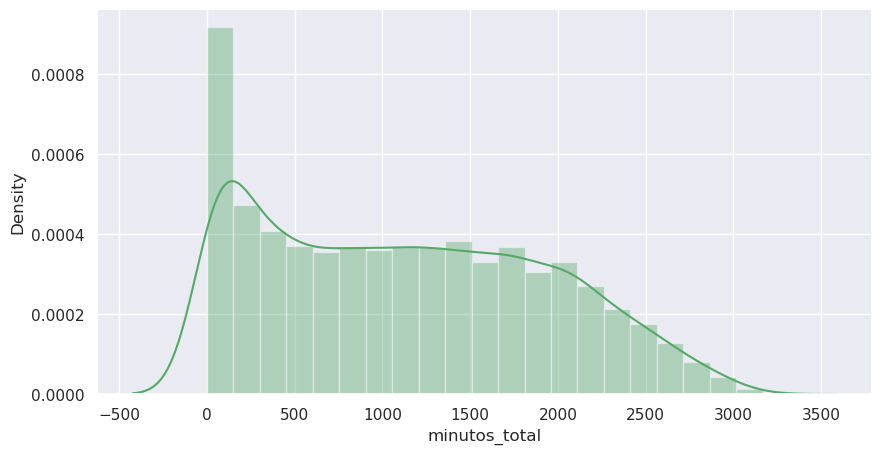

In [24]:
# Distribución de los minutos_total de los jugadores en el DataSet

plt.figure(figsize = (10,5))
sns.distplot(data_nba.minutos_total, kde = True, color = 'g');

In [25]:
# Porcentaje de jugadores que juegan menos de 10 partidos (= 480 minutos) en la NBA

player_1 = (len((data_nba.loc[(data_nba['minutos_total'] < 480)])) / len(data_nba)) * 100

print('El porcentaje de jugadores que juegan menos de 10 partidos en la NBA es', round((player_1),2))

El porcentaje de jugadores que juegan menos de 10 partidos en la NBA es 28.13


In [26]:
# Se agrupan los minutos_total por temporada

temp_minutos = data_nba.loc[:, ['temporada', 'minutos_total']].groupby(data_nba['temporada']).sum()

'''
Se elimina la temporada actual porque están en mitad de la misma, por tanto los datos no abarcan el mismo
rango temporal.
'''

min_total = temp_minutos.loc[(temp_minutos.index != '2022-2023')]
min_total

,minutos_total
temporada,
2011-2012,479064
2012-2013,594486
2013-2014,595189
2014-2015,595214
2015-2016,544352
2016-2017,585858
2017-2018,593865
2018-2019,587263
2019-2020,507836


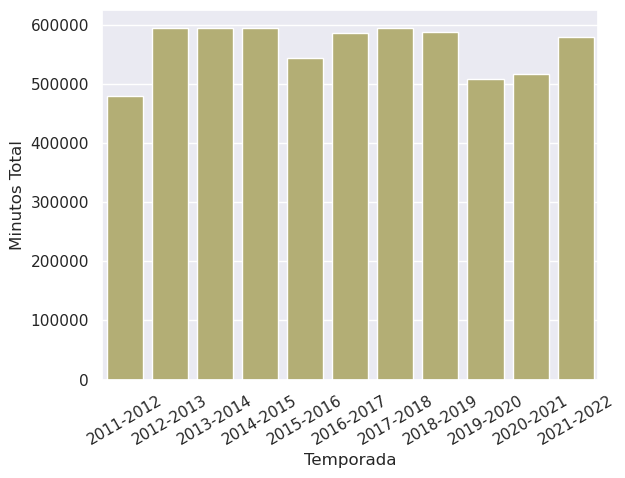

In [27]:
# Distribución de minutos_total por temporada

mins = sns.barplot(x = min_total.index, 
                     y = min_total['minutos_total'],
                     data = temp_minutos, 
                     color = 'darkkhaki');


mins.set_xticklabels(min_total.index, rotation = 30)

mins.set(xlabel='Temporada', ylabel='Minutos Total');

In [28]:
# Estadísticos del DataSet en base a los puntos_total

data_nba.puntos_total.describe()

count    5838.000000
mean      495.642857
std       444.633336
min         0.000000
25%       131.000000
50%       391.500000
75%       753.000000
max      2818.000000
Name: puntos_total, dtype: float64

/home/inma/.conda/envs/general/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


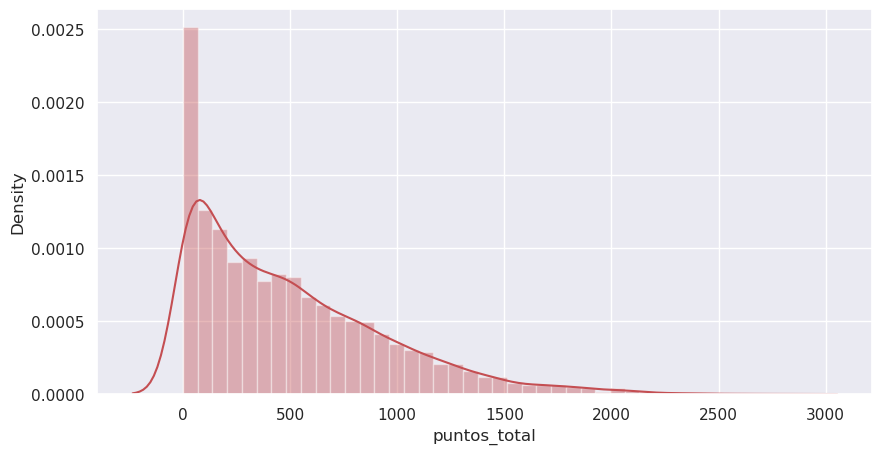

In [29]:
# Distribución de los puntos_total de los jugadores en el DataSet

plt.figure(figsize = (10,5))
sns.distplot(data_nba.puntos_total, kde = True, color = 'r');

In [30]:
# Porcentaje de jugadores que meten menos de 200 partidos en la NBA

puntos = (len((data_nba.loc[(data_nba['puntos_total'] < 200)])) / len(data_nba)) * 100

print('El porcentaje de jugadores que meten menos de 200 puntos en la NBA es', round((puntos),2), '%')

El porcentaje de jugadores que meten menos de 200 puntos en la NBA es 32.79 %


In [31]:
# Se agrupan los puntos_total por temporada

temp_puntos = data_nba.loc[:, ['temporada', 'puntos_total']].groupby(data_nba['temporada']).sum()

'''
Se elimina la temporada actual porque están en mitad de la misma, por tanto los datos no abarcan el mismo
rango temporal.
'''

point_total = temp_puntos.loc[(temp_puntos.index != '2022-2023')]
point_total

,puntos_total
temporada,
2011-2012,190594
2012-2013,241223
2013-2014,248475
2014-2015,246035
2015-2016,234098
2016-2017,256752
2017-2018,261580
2018-2019,271074
2019-2020,235256


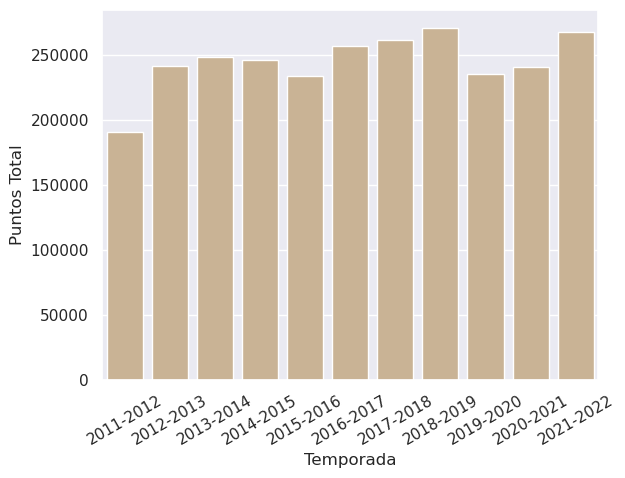

In [32]:
# Distribución de puntos_total por temporada

points = sns.barplot(x = point_total.index, 
                     y = point_total['puntos_total'],
                     data = point_total, 
                     color = 'tan');


points.set_xticklabels(point_total.index, rotation = 30)

points.set(xlabel = 'Temporada', ylabel = 'Puntos Total');

In [33]:
# Se obtienen los valores de la columna 'posicion' para reemplazar la sigla por su significado

data_nba['posicion'].unique()

array(['A', 'B', 'AP', 'P', 'A-E', 'E-A', nan, 'PG'], dtype=object)

In [34]:
# Se reemplazan las siglas de la columna 'posicion'

position = data_nba.posicion.str.replace('B','Base').replace('A','Alero').replace('P','Pivot').replace('AP','Ala-Pivot').replace('A-E','Ala-Escolta').replace('E-A','Escolta-Alero').replace('PG','Base')
data_nba['posicion_juego'] = position
data_nba.drop(columns = 'posicion', inplace = True)
data_nba

,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,2022-2023,2022.0,1627853,Ryan Arcidiacono,2016,1.90,88.5,473,Portland,Trail Blazers,Western,13,0.2,0.0,0.300,0.462,0.077,16.7,0.000,0.077,0.0,0.308,0.077,25.0,0.2,2.8,0.3,0.0,0.3,0.2,0.2,0.2,2,0,0.300,6,1,16.7,0,0,0.0,4,1,25.0,36,3,4,0,4,2,2,3,0.0,Base
5834,2022-2023,2022.0,1631205,Buddy Boeheim,2022,1.98,93.0,474,Detroit,Pistons,Eastern,1,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0.0,Alero
5835,2022-2023,2022.0,1630577,Julian Champagnie,2022,2.01,98.4,475,San Antonio,Spurs,Western,2,0.0,0.0,-0.500,1.000,0.000,0.0,0.000,0.000,0.0,0.500,0.000,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.5,0.0,0,0,-0.500,2,0,0.0,0,0,0.0,1,0,0.0,7,0,0,0,0,0,1,0,0.0,Alero
5836,2022-2023,2022.0,1631211,Trevor Keels,2022,1.93,100.2,476,New York,Knicks,Eastern,1,0.0,0.0,0.000,1.000,0.000,0.0,0.000,0.000,0.0,1.000,0.000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.000,1,0,0.0,0,0,0.0,1,0,0.0,1,0,1,0,1,0,0,0,0.0,Base


In [35]:
# Número de jugadores en la NBA por temporada

data_nba.temporada.value_counts()

2017-2018    548
2019-2020    510
2020-2021    503
2018-2019    498
2014-2015    495
2021-2022    493
2013-2014    490
2011-2012    480
2012-2013    479
2022-2023    477
2016-2017    451
2015-2016    414
Name: temporada, dtype: int64

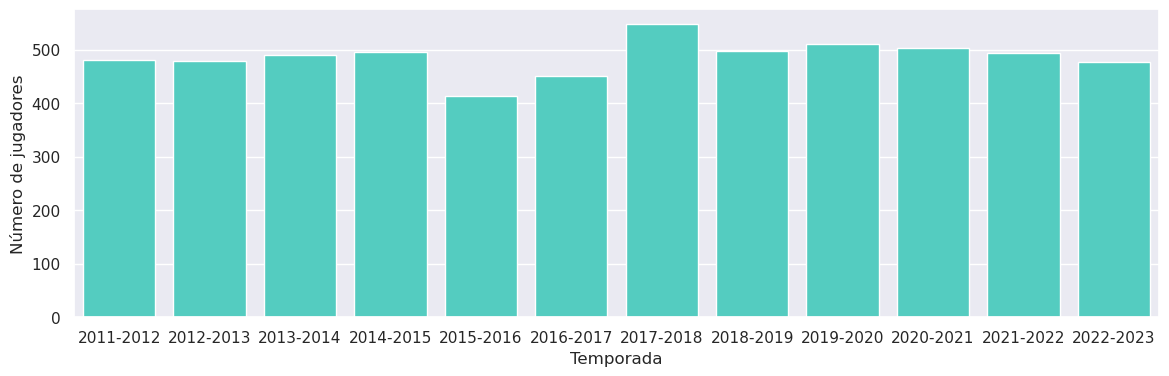

In [36]:
# Gráfico de barras sobre el número de jugadores en la NBA por cada temporada

plt.figure(figsize = (14,4))

numplayers = sns.countplot(x = 'temporada', 
              data = data_nba, 
              color = 'turquoise');

numplayers.set(xlabel='Temporada', ylabel='Número de jugadores');

In [37]:
# Número de jugadores por posición en todas las temporada

data_nba.posicion_juego.value_counts()

Base             2118
Alero            1717
Pivot             637
Ala-Pivot         609
Escolta-Alero     439
Ala-Escolta       200
Name: posicion_juego, dtype: int64

In [38]:
# Proporción de jugadores por posición en todas las temporada

round((data_nba.posicion_juego.value_counts(normalize = True) * 100), 2)

Base             37.03
Alero            30.02
Pivot            11.14
Ala-Pivot        10.65
Escolta-Alero     7.67
Ala-Escolta       3.50
Name: posicion_juego, dtype: float64

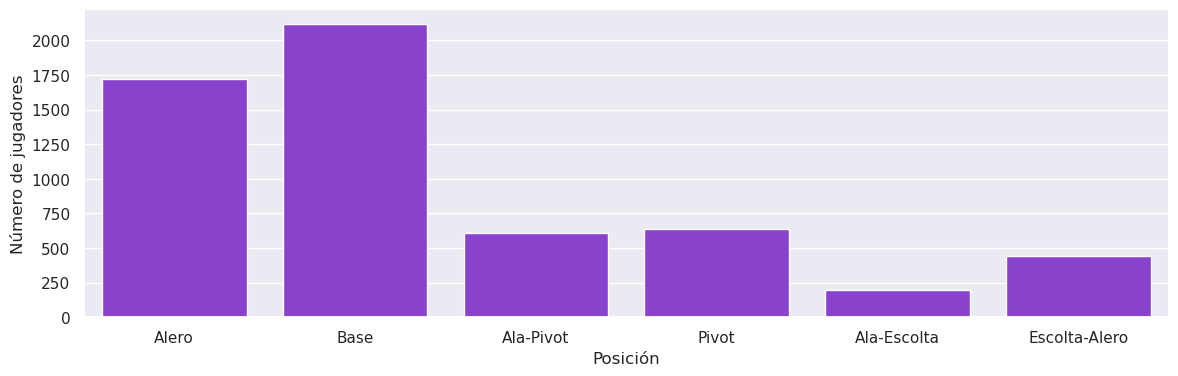

In [39]:
# Gráfico de barras sobre el número de jugadores en la NBA por posición del 2014 al 2022

plt.figure(figsize = (14,4))

position_player = sns.countplot(x = 'posicion_juego', 
                           data = data_nba,
                           color = 'blueviolet');

position_player.set(xlabel='Posición', ylabel='Número de jugadores');

In [40]:
# Número de jugadores por posición y por temporada

temp_position = data_nba['posicion_juego'].groupby(data_nba['temporada']).value_counts()
temp_position

temporada  posicion_juego
2011-2012  Base              161
           Alero             134
           Pivot              70
           Ala-Pivot          41
           Escolta-Alero      21
                            ... 
2022-2023  Alero             142
           Ala-Pivot          57
           Pivot              42
           Escolta-Alero      39
           Ala-Escolta        17
Name: posicion_juego, Length: 72, dtype: int64

In [41]:
# Proporción de jugadores por posición y por temporada

round((data_nba['posicion_juego'].groupby(data_nba['temporada']).value_counts(normalize = True) * 100),2)

temporada  posicion_juego
2011-2012  Base              36.43
           Alero             30.32
           Pivot             15.84
           Ala-Pivot          9.28
           Escolta-Alero      4.75
                             ...  
2022-2023  Alero             29.77
           Ala-Pivot         11.95
           Pivot              8.81
           Escolta-Alero      8.18
           Ala-Escolta        3.56
Name: posicion_juego, Length: 72, dtype: float64

In [48]:
# Se crean listas por cada posición con el número de jugadores por temporada

base = []
escolta_alero = []
alero = []
ala_escolta = []
ala_pivot = []
pivot = []


for ind, values in temp_position.items():
    
    if ind[1] == 'Base':
        base.append(values)
        
    elif ind[1] == 'Escolta-Alero':
        escolta_alero.append(values)
        
    elif ind[1] == 'Alero':
        alero.append(values)
        
    elif ind[1] == 'Ala-Escolta':
        ala_escolta.append(values)
        
    elif ind[1] == 'Ala-Pivot':
        ala_pivot.append(values)
        
    elif ind[1] == 'Pivot':
        pivot.append(values)
        
        
print(base)
print(escolta_alero)
print(alero)
print(ala_escolta)
print(ala_pivot)
print(pivot)

[161, 160, 160, 180, 147, 162, 214, 195, 177, 187, 195, 180]
[21, 22, 21, 31, 31, 37, 39, 33, 65, 53, 47, 39]
[134, 144, 136, 156, 130, 150, 152, 159, 141, 137, 136, 142]
[15, 13, 14, 14, 12, 7, 23, 16, 27, 23, 19, 17]
[41, 46, 49, 51, 43, 34, 55, 39, 67, 66, 61, 57]
[70, 60, 64, 63, 51, 61, 65, 56, 33, 37, 35, 42]


In [49]:
# Se crea un nuevo DataFrame ('df_positions') para visualizr el número de jugadores por posición y por temporada

df_positions = pd.DataFrame({'Temporada': ['2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', 
                                           '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', 
                                           '2021-2022', '2022-2023'],
                             
                             'Base': base,
                             'Escolta-Alero':escolta_alero,
                             'Alero':alero,
                             'Ala-Escolta': ala_escolta,
                             'Ala-Pivot': ala_pivot,
                             'Pivot': pivot
                            })

df_positions.set_index('Temporada', inplace = True)
df_positions

,Base,Escolta-Alero,Alero,Ala-Escolta,Ala-Pivot,Pivot
Temporada,,,,,,
2011-2012,161,21,134,15,41,70
2012-2013,160,22,144,13,46,60
2013-2014,160,21,136,14,49,64
2014-2015,180,31,156,14,51,63
2015-2016,147,31,130,12,43,51
2016-2017,162,37,150,7,34,61
2017-2018,214,39,152,23,55,65
2018-2019,195,33,159,16,39,56
2019-2020,177,65,141,27,67,33


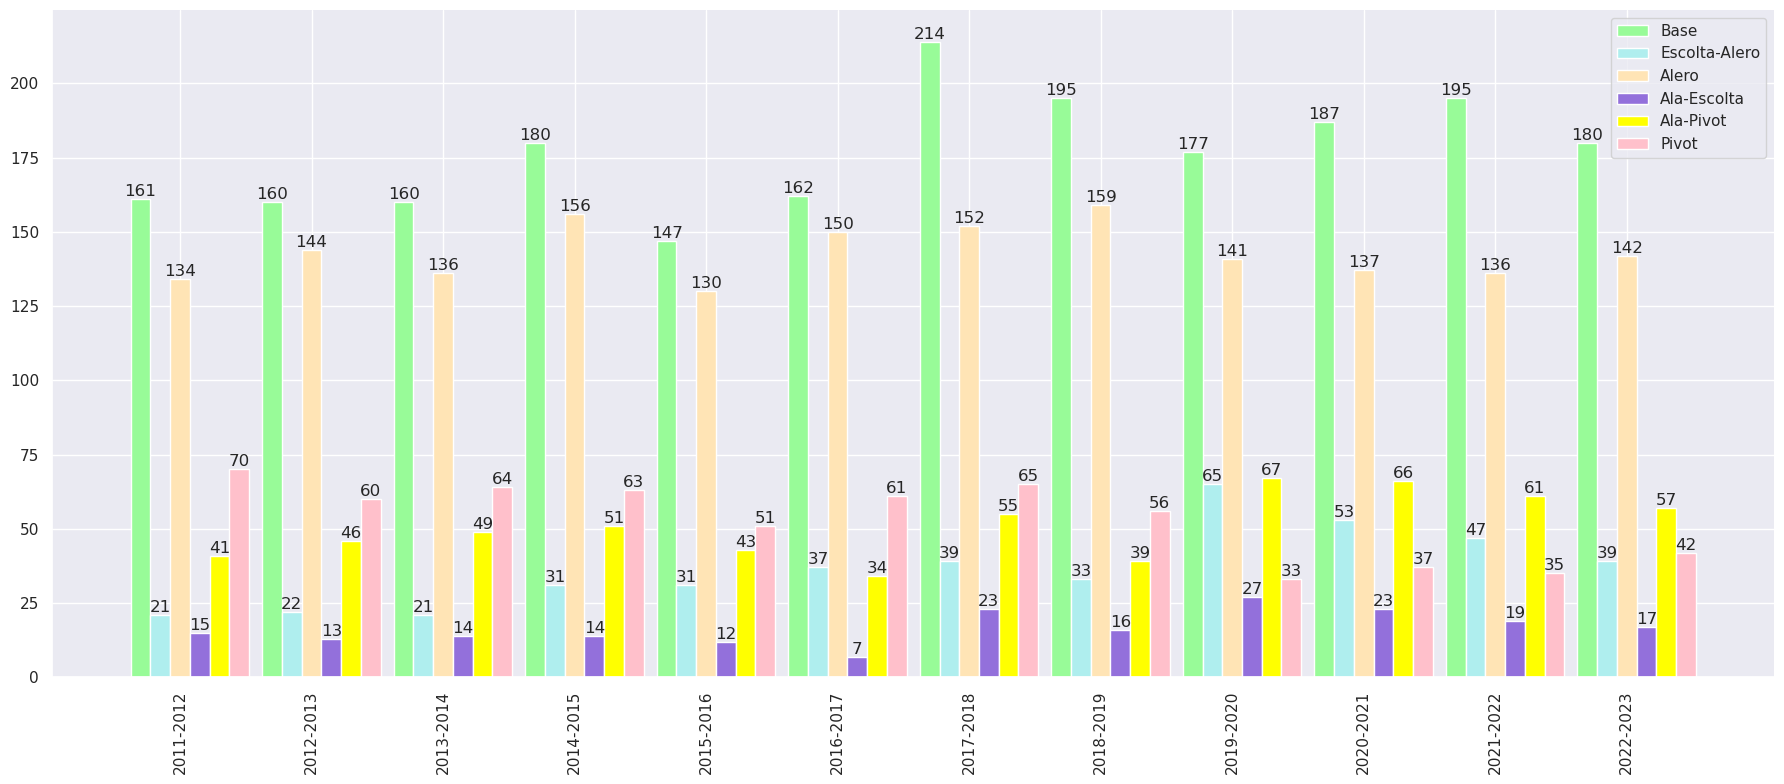

In [50]:
# Visualización - Comparación del número de jugadores por posición y por temporada

fig, ax = plt.subplots(figsize = (18, 8)) 

bar_width = 0.15

x = np.arange(df_positions.index.size) 

# ax.bar para crear barras
bar_base = ax.bar(x - (2*bar_width), df_positions[ 'Base'], bar_width, label = 'Base', color = 'palegreen')
bar_alero = ax.bar(x - (bar_width), df_positions['Escolta-Alero'], bar_width, label = 'Escolta-Alero', color = 'paleturquoise')
bar_escolta_alero = ax.bar(x, df_positions['Alero'], bar_width, label = 'Alero', color = 'moccasin') 
bar_ala_escolta = ax.bar(x + bar_width, df_positions['Ala-Escolta'], bar_width, label = 'Ala-Escolta', color = 'mediumpurple')
bar_ala_pivot = ax.bar(x + (2*bar_width), df_positions['Ala-Pivot'], bar_width, label = 'Ala-Pivot', color = 'yellow')
bar_pivot = ax.bar(x + (3*bar_width), df_positions['Pivot'], bar_width, label = 'Pivot', color = 'pink')



ax.set_xticks(x)
ax.set_xticklabels(df_positions.index, rotation = 90);
ax.legend();


# Etiquetas en las barras

ax.bar_label(bar_base)
ax.bar_label(bar_escolta_alero)
ax.bar_label(bar_alero)
ax.bar_label(bar_ala_escolta)
ax.bar_label(bar_ala_pivot)
ax.bar_label(bar_pivot);

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

fig.tight_layout()

In [51]:
'''
Se observa que parte de los jugadores del DataSet han jugado 0 minutos o menos de un partido entero (48 minutos)
a lo largo de la temporada. Por ello, se van a eliminar estos valores de la tabla, ya que en la mayoría de los 
campos de sus estadísticas son iguales a 0,y podrían sesgar el posterior análisis se va a realizar.

'''

df_nba = data_nba.loc[(data_nba.minutos_total != 0) & (data_nba.minutos_total > 48)]
df_nba 

# Este es el DataFrame que se usará para análisis posteriores

,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,2022-2023,2022.0,1629644,KZ Okpala,2019,2.03,97.5,455,Sacramento,Kings,Western,35,0.4,0.2,2.200,1.086,0.457,42.1,0.229,0.200,87.5,0.600,0.200,33.3,1.3,7.1,0.8,0.2,1.0,1.1,0.2,0.2,13,7,2.200,38,16,42.1,8,7,87.5,21,7,33.3,248,46,27,7,34,7,7,39,0.0,Ala-Escolta
5817,2022-2023,2022.0,1631098,Johnny Davis,2022,1.93,88.5,457,Washington,Wizards,Eastern,13,0.2,0.1,1.100,1.385,0.462,33.3,0.231,0.077,100.0,0.308,0.077,25.0,1.2,4.8,0.5,0.1,0.6,1.0,0.1,0.2,2,1,1.100,18,6,33.3,3,3,100.0,4,1,25.0,62,16,7,1,8,2,1,13,0.0,Base
5820,2022-2023,2022.0,1630556,Kessler Edwards,2021,2.01,92.1,460,Sacramento,Kings,Western,15,0.3,0.1,0.900,1.667,0.400,24.0,0.133,0.133,50.0,0.867,0.133,15.4,1.0,6.0,0.6,0.4,1.0,0.2,0.2,0.3,4,1,0.900,25,6,24.0,2,1,50.0,13,2,15.4,90,15,9,6,15,4,3,3,0.0,Alero
5826,2022-2023,2022.0,1631246,Vince Williams Jr.,2022,1.93,93.0,466,Memphis,Grizzlies,Western,9,0.3,0.1,1.200,1.444,0.333,23.1,0.000,0.111,0.0,1.000,0.111,11.1,0.8,5.4,0.6,0.2,0.8,0.7,0.4,0.1,3,1,1.200,13,3,23.1,0,0,0.0,9,1,11.1,49,7,5,2,7,1,4,6,0.0,Base


In [52]:
df_nba.minutos_total.describe()

count    5439.000000
mean     1212.441074
std       768.955878
min        49.000000
25%       529.000000
50%      1174.000000
75%      1815.500000
max      3167.000000
Name: minutos_total, dtype: float64

/home/inma/.conda/envs/general/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


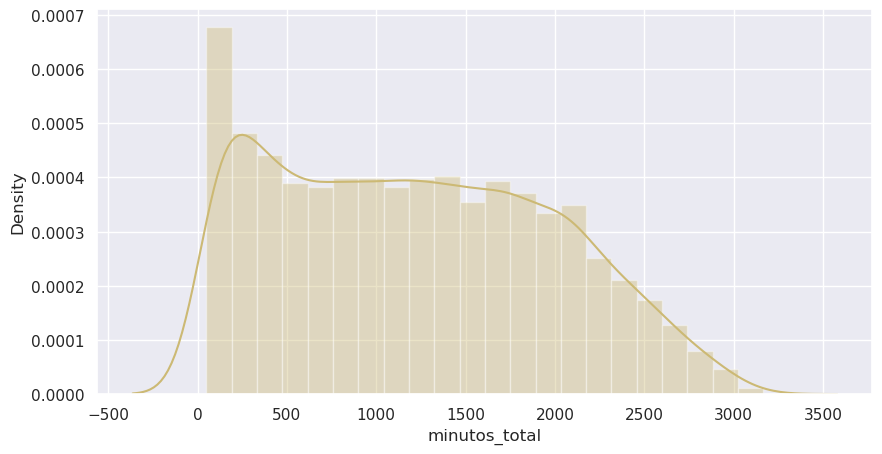

In [53]:
# Distribución de los minutos_totales de los jugadores en 'df_nba'

plt.figure(figsize = (10,5))

sns.distplot(df_nba.minutos_total, kde = True, color = 'y');

In [54]:
# Porcentaje de jugadores que juegan menos de 10 partidos en la NBA

player_2 = (len((df_nba.loc[(df_nba['minutos_total'] < 480)])) / len(df_nba)) * 100

print('El porcentaje de jugadores que juegan menos de 10 partido en la NBA es', round((player_2),2))

El porcentaje de jugadores que juegan menos de 10 partido en la NBA es 22.85


In [55]:
data_nba.puntos_total.describe()

count    5838.000000
mean      495.642857
std       444.633336
min         0.000000
25%       131.000000
50%       391.500000
75%       753.000000
max      2818.000000
Name: puntos_total, dtype: float64

/home/inma/.conda/envs/general/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


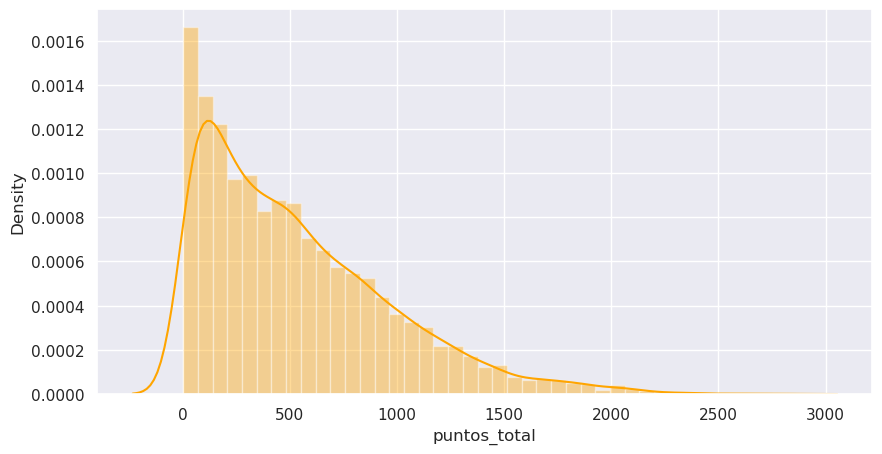

In [56]:
# Distribución de los puntos_totales de los jugadores en 'df_nba'

plt.figure(figsize = (10,5))

sns.distplot(df_nba.puntos_total, kde = True, color = 'orange');

In [57]:
# Porcentaje de jugadores que meten menos de 200 puntos en la NBA

puntos_1 = (len((df_nba.loc[(df_nba['puntos_total'] < 200)])) / len(df_nba)) * 100

print('El porcentaje de jugadores que meten menos de 200 puntos en la NBA es', round((puntos_1),2))

El porcentaje de jugadores que meten menos de 200 puntos en la NBA es 27.85


### 2. Examen exploratorio de los datos

### **2.1. Diferencia entre la media de los PIR (*Performance Index Rating*) de los jugadores de la NBA**

Se quiere comprobar si la pandemia ha afectado al PIR (*Performance Index Rating*) de los jugadores de la NBA. Es decir, se quiere confirmar si durante el año de la pandemia (2019-2020), el PIR de los jugadores disminuyó con respecto a el año previo (2018-2019) y el posterior (2021-2022) a la misma.

Para ello, primero se ha de saber a qué refiere la variable de PIR y cómo se calcula, se adjuntan los siguientes links:

+ [Valoración](https://es.wikipedia.org/wiki/Valoraci%C3%B3n_(baloncesto)

+ [Eficiencia](https://es.wikipedia.org/wiki/Eficiencia_(baloncesto)#:~:text=Se%20calcula%20como%3A,Tapones%20Recibidos%20%2B%20Faltas%20Realizadas)

Fórmula para calcular la valoración/PIR de cada jugador:

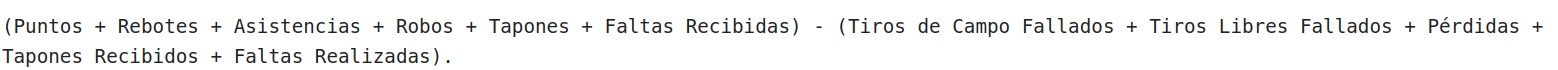

Una vez obtenido este dato, se tiene que dividir dicho valor por el número de partidos jugados por el jugador para que sea el PIR medio de la temporada

In [58]:
'''
Primero se filtra el DataFrame 'data_nba' para trabajar sobre los datos que se compararán en este 
análisis:

        - La temporada previa a el año de la pandemia = 2018-2019
        - La temporada correspondiente a el año de la pandemia = 2019-2020
        - La temporada posterior a el año de la pandemia = 2020-2021

'''

pir = df_nba.loc[(df_nba.temporada >= '2018-2019') & (df_nba.temporada <= '2020-2021'), ['temporada',
                                                                                         'nombre_jugador',
                                                                                         'nombre_equipo',
                                                                                         'partidos_jugados',
                                                                                         'asistencias_total',
                                                                                         'tapones_total',
                                                                                         'tci_total',
                                                                                         'tce_total',
                                                                                         'tli_total',
                                                                                         'tle_total',                                                                
                                                                                         'tti_total',
                                                                                         'tte_total',
                                                                                         'puntos_total',
                                                                                         'rebotes_total',
                                                                                         'perdidas_total',
                                                                                         'robos_total',
                                                                                         'faltas_total',
                                                                                         'faltas_tecnicas_total']]

pir

,temporada,nombre_jugador,nombre_equipo,partidos_jugados,asistencias_total,tapones_total,tci_total,tce_total,tli_total,tle_total,tti_total,tte_total,puntos_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total
3357,2018-2019,James Harden,Rockets,78,586,58,1909,843,858,754,1028,378,2818,518,387,158,244,8.0
3358,2018-2019,Paul George,Thunder,77,318,34,1614,707,540,453,757,292,2159,628,205,170,214,11.0
3359,2018-2019,Giannis Antetokounmpo,Bucks,72,424,110,1247,721,686,500,203,52,1994,898,268,92,232,4.0
3360,2018-2019,Joel Embiid,76ers,64,234,122,1199,580,649,522,263,79,1761,871,226,46,211,10.0
3361,2018-2019,LeBron James,Lakers,55,454,33,1095,558,418,278,327,111,1505,465,197,72,94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,2020-2021,Tyrell Terry,Mavericks,11,6,0,16,5,3,1,7,0,11,6,2,5,2,0.0
4855,2020-2021,Kostas Antetokounmpo,Lakers,15,1,4,10,3,13,6,0,0,12,19,11,2,8,0.0
4856,2020-2021,Nick Richards,Hornets,18,2,0,9,4,11,7,1,0,15,11,3,0,7,0.0
4857,2020-2021,Keljin Blevins,Trail Blazers,17,4,0,20,5,0,0,8,2,12,10,5,2,8,0.0


In [59]:
'''
Para calcular el PIR medio de cada jugador por temporada, se itera sobre el DataFrame 'pir' y se
ejecuta la fórmula matemática que permite calcular este valor:


   valoración = (asistencias_total + tapones_total + tiros_campo_encestados_total + tiros_libres_encestados_total + 
                tiros_triple_encestados_total + puntos_total + rebotes_total + robos_total) - 
                (tiros_campos_intentados_total - tiros_libres_intentados_total - tiros_triple_intentados_total - 
                perdidas_total - faltas_total - faltas_tecnicas_total)
                     
                     
Y se divide el resultado de esta fórmula entre el número de partidos que ha jugado el jugador 
(pir['partidos_jugados']).

'''

for player in pir:
    
    valoracion = (df_nba['asistencias_total'] + df_nba['tapones_total'] + df_nba['tce_total'] + 
                  df_nba['tle_total'] + df_nba['tte_total'] + df_nba['puntos_total'] + 
                  df_nba['rebotes_total'] + df_nba['robos_total']- df_nba['tci_total'] - 
                  df_nba['tli_total'] - df_nba['tti_total'] - df_nba['perdidas_total'] - 
                  df_nba['faltas_total'] - df_nba['faltas_tecnicas_total'])
    
    valoracion_media = valoracion / df_nba['partidos_jugados']
    
    
df_nba['pir_medio_total'] = round(valoracion_media, 2)
pir['pir_medio_total'] = round(valoracion_media, 2)
    
df_nba

/tmp/ipykernel_6984/3694913639.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba['pir_medio_total'] = round(valoracion_media, 2)


,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero,21.98
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base,16.02
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero,26.73
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot,22.27
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,2022-2023,2022.0,1629644,KZ Okpala,2019,2.03,97.5,455,Sacramento,Kings,Western,35,0.4,0.2,2.200,1.086,0.457,42.1,0.229,0.200,87.5,0.600,0.200,33.3,1.3,7.1,0.8,0.2,1.0,1.1,0.2,0.2,13,7,2.200,38,16,42.1,8,7,87.5,21,7,33.3,248,46,27,7,34,7,7,39,0.0,Ala-Escolta,0.69
5817,2022-2023,2022.0,1631098,Johnny Davis,2022,1.93,88.5,457,Washington,Wizards,Eastern,13,0.2,0.1,1.100,1.385,0.462,33.3,0.231,0.077,100.0,0.308,0.077,25.0,1.2,4.8,0.5,0.1,0.6,1.0,0.1,0.2,2,1,1.100,18,6,33.3,3,3,100.0,4,1,25.0,62,16,7,1,8,2,1,13,0.0,Base,-0.15
5820,2022-2023,2022.0,1630556,Kessler Edwards,2021,2.01,92.1,460,Sacramento,Kings,Western,15,0.3,0.1,0.900,1.667,0.400,24.0,0.133,0.133,50.0,0.867,0.133,15.4,1.0,6.0,0.6,0.4,1.0,0.2,0.2,0.3,4,1,0.900,25,6,24.0,2,1,50.0,13,2,15.4,90,15,9,6,15,4,3,3,0.0,Alero,0.00
5826,2022-2023,2022.0,1631246,Vince Williams Jr.,2022,1.93,93.0,466,Memphis,Grizzlies,Western,9,0.3,0.1,1.200,1.444,0.333,23.1,0.000,0.111,0.0,1.000,0.111,11.1,0.8,5.4,0.6,0.2,0.8,0.7,0.4,0.1,3,1,1.200,13,3,23.1,0,0,0.0,9,1,11.1,49,7,5,2,7,1,4,6,0.0,Base,-0.33


In [60]:
# Se comprueba que todos los valores de 'pir_medio_total' se encuentren dentro de un rango razonable

df_nba.loc[(df_nba.pir_medio_total > 40)]

# Se encuentra un valor que contiene un 'pir_medio_total' que no es correcto (pir_medio_total' = '136.25')

,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total
1650,2014-2015,2014.0,101150,Lou Williams,2005,1.85,79.4,202,Toronto,Raptors,Eastern,4,1.0,0.0,11.8,232.0,93.75,33.3,98.75,38.0,77.8,111.75,38.0,27.3,8.3,18.0,0.8,0.5,1.3,1.3,0.5,1.0,164,10,11.8,928,375,33.3,395,340,77.8,447,152,27.3,2016,1242,127,24,151,101,88,103,3.0,Base,136.25


In [61]:
'''
Se identifica el error en el número de partidos jugados ('partidos_jugados' = 4). 
Para corregirlo correctamente, se busca la información en otra base de datos sobre los partidos jugados por
este jugador en específico ('Lou Williams') en la temporada 2014-2015:
        
        - https://www.proballers.com/es/baloncesto/jugador/24293/lou-williams

''' 

for index, value in enumerate(df_nba['partidos_jugados']):
    if index == 201:
        df_nba['partidos_jugados'][index] = 80

df_nba

/tmp/ipykernel_6984/1453546174.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba['partidos_jugados'][index] = 80


,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero,21.98
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base,16.02
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero,26.73
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot,22.27
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,2022-2023,2022.0,1629644,KZ Okpala,2019,2.03,97.5,455,Sacramento,Kings,Western,35,0.4,0.2,2.200,1.086,0.457,42.1,0.229,0.200,87.5,0.600,0.200,33.3,1.3,7.1,0.8,0.2,1.0,1.1,0.2,0.2,13,7,2.200,38,16,42.1,8,7,87.5,21,7,33.3,248,46,27,7,34,7,7,39,0.0,Ala-Escolta,0.69
5817,2022-2023,2022.0,1631098,Johnny Davis,2022,1.93,88.5,457,Washington,Wizards,Eastern,13,0.2,0.1,1.100,1.385,0.462,33.3,0.231,0.077,100.0,0.308,0.077,25.0,1.2,4.8,0.5,0.1,0.6,1.0,0.1,0.2,2,1,1.100,18,6,33.3,3,3,100.0,4,1,25.0,62,16,7,1,8,2,1,13,0.0,Base,-0.15
5820,2022-2023,2022.0,1630556,Kessler Edwards,2021,2.01,92.1,460,Sacramento,Kings,Western,15,0.3,0.1,0.900,1.667,0.400,24.0,0.133,0.133,50.0,0.867,0.133,15.4,1.0,6.0,0.6,0.4,1.0,0.2,0.2,0.3,4,1,0.900,25,6,24.0,2,1,50.0,13,2,15.4,90,15,9,6,15,4,3,3,0.0,Alero,0.00
5826,2022-2023,2022.0,1631246,Vince Williams Jr.,2022,1.93,93.0,466,Memphis,Grizzlies,Western,9,0.3,0.1,1.200,1.444,0.333,23.1,0.000,0.111,0.0,1.000,0.111,11.1,0.8,5.4,0.6,0.2,0.8,0.7,0.4,0.1,3,1,1.200,13,3,23.1,0,0,0.0,9,1,11.1,49,7,5,2,7,1,4,6,0.0,Base,-0.33


In [62]:
# Y se vuelve a calcular el 'pir_medio_total' para ese jugador

for index, value in enumerate(df_nba['pir_medio_total']):
    
    if index == 201:
    
        valoracion = (df_nba['asistencias_total'][index] + df_nba['tapones_total'][index] + 
                      df_nba['tce_total'][index] + df_nba['tle_total'][index] + df_nba['tte_total'][index] + 
                      df_nba['puntos_total'][index] + df_nba['rebotes_total'][index] + 
                      df_nba['robos_total'][index] - df_nba['tci_total'][index] - df_nba['tli_total'][index] - 
                      df_nba['tti_total'][index] - df_nba['perdidas_total'][index] - 
                      df_nba['faltas_total'][index] - df_nba['faltas_tecnicas_total'][index])

        valoracion_media = valoracion / df_nba['partidos_jugados'][index]
        
        df_nba['pir_medio_total'][index] = round(valoracion_media, 2)
        pir['pir_medio_total'][index] = round(valoracion_media, 2)
        
df_nba

/tmp/ipykernel_6984/616971715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba['pir_medio_total'][index] = round(valoracion_media, 2)
/tmp/ipykernel_6984/616971715.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pir['pir_medio_total'][index] = round(valoracion_media, 2)


,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero,21.98
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base,16.02
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero,26.73
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot,22.27
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,2022-2023,2022.0,1629644,KZ Okpala,2019,2.03,97.5,455,Sacramento,Kings,Western,35,0.4,0.2,2.200,1.086,0.457,42.1,0.229,0.200,87.5,0.600,0.200,33.3,1.3,7.1,0.8,0.2,1.0,1.1,0.2,0.2,13,7,2.200,38,16,42.1,8,7,87.5,21,7,33.3,248,46,27,7,34,7,7,39,0.0,Ala-Escolta,0.69
5817,2022-2023,2022.0,1631098,Johnny Davis,2022,1.93,88.5,457,Washington,Wizards,Eastern,13,0.2,0.1,1.100,1.385,0.462,33.3,0.231,0.077,100.0,0.308,0.077,25.0,1.2,4.8,0.5,0.1,0.6,1.0,0.1,0.2,2,1,1.100,18,6,33.3,3,3,100.0,4,1,25.0,62,16,7,1,8,2,1,13,0.0,Base,-0.15
5820,2022-2023,2022.0,1630556,Kessler Edwards,2021,2.01,92.1,460,Sacramento,Kings,Western,15,0.3,0.1,0.900,1.667,0.400,24.0,0.133,0.133,50.0,0.867,0.133,15.4,1.0,6.0,0.6,0.4,1.0,0.2,0.2,0.3,4,1,0.900,25,6,24.0,2,1,50.0,13,2,15.4,90,15,9,6,15,4,3,3,0.0,Alero,0.00
5826,2022-2023,2022.0,1631246,Vince Williams Jr.,2022,1.93,93.0,466,Memphis,Grizzlies,Western,9,0.3,0.1,1.200,1.444,0.333,23.1,0.000,0.111,0.0,1.000,0.111,11.1,0.8,5.4,0.6,0.2,0.8,0.7,0.4,0.1,3,1,1.200,13,3,23.1,0,0,0.0,9,1,11.1,49,7,5,2,7,1,4,6,0.0,Base,-0.33


In [63]:
pir

,temporada,nombre_jugador,nombre_equipo,partidos_jugados,asistencias_total,tapones_total,tci_total,tce_total,tli_total,tle_total,tti_total,tte_total,puntos_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,pir_medio_total
3357,2018-2019,James Harden,Rockets,78,586,58,1909,843,858,754,1028,378,2818,518,387,158,244,8.0,21.53
3358,2018-2019,Paul George,Thunder,77,318,34,1614,707,540,453,757,292,2159,628,205,170,214,11.0,18.44
3359,2018-2019,Giannis Antetokounmpo,Bucks,72,424,110,1247,721,686,500,203,52,1994,898,268,92,232,4.0,29.88
3360,2018-2019,Joel Embiid,76ers,64,234,122,1199,580,649,522,263,79,1761,871,226,46,211,10.0,25.89
3361,2018-2019,LeBron James,Lakers,55,454,33,1095,558,418,278,327,111,1505,465,197,72,94,0.0,24.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,2020-2021,Tyrell Terry,Mavericks,11,6,0,16,5,3,1,7,0,11,6,2,5,2,0.0,0.36
4855,2020-2021,Kostas Antetokounmpo,Lakers,15,1,4,10,3,13,6,0,0,12,19,11,2,8,0.0,0.33
4856,2020-2021,Nick Richards,Hornets,18,2,0,9,4,11,7,1,0,15,11,3,0,7,0.0,0.44
4857,2020-2021,Keljin Blevins,Trail Blazers,17,4,0,20,5,0,0,8,2,12,10,5,2,8,0.0,-0.35


In [64]:
# Se comprueba que se haya corregido correctamente el valor

df_nba.loc[(df_nba.nombre_jugador == 'Lou Williams')]

,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total
56,2011-2012,2011.0,101150,Lou Williams,2005,1.85,79.4,57,Philadelphia,76ers,Eastern,64,3.5,0.2,12.703,12.219,4.969,40.7,4.563,1.297,81.2,3.578,1.297,36.2,14.9,26.3,2.0,0.5,2.5,1.4,0.8,1.1,221,18,12.703,782,318,40.7,292,237,81.2,229,83,36.2,1682,956,125,30,155,71,53,90,1.0,Base,9.00
552,2012-2013,2012.0,101150,Lou Williams,2005,1.85,79.4,73,Atlanta,Hawks,Eastern,39,3.6,0.2,12.300,11.359,4.795,42.2,3.103,1.846,86.8,5.026,1.846,36.7,14.1,28.7,1.8,0.2,2.0,1.4,1.1,1.9,139,10,12.300,443,187,42.2,121,105,86.8,196,72,36.7,1119,551,72,8,80,74,44,55,1.0,Base,7.64
1102,2013-2014,2013.0,101150,Lou Williams,2005,1.85,79.4,144,Atlanta,Hawks,Eastern,60,3.5,0.0,9.900,8.217,3.283,40.0,2.983,1.317,84.9,3.850,1.317,34.2,10.4,24.1,1.9,0.2,2.1,1.1,0.7,1.5,210,4,9.900,493,197,40.0,179,152,84.9,231,79,34.2,1445,625,114,10,124,92,45,65,0.0,Base,6.27
1650,2014-2015,2014.0,101150,Lou Williams,2005,1.85,79.4,202,Toronto,Raptors,Eastern,4,1.0,0.0,11.800,232.000,93.750,33.3,98.750,38.000,77.8,111.750,38.000,27.3,8.3,18.0,0.8,0.5,1.3,1.3,0.5,1.0,164,10,11.800,928,375,33.3,395,340,77.8,447,152,27.3,2016,1242,127,24,151,101,88,103,3.0,Base,136.25
2000,2015-2016,2015.0,101150,Lou Williams,2005,1.85,79.4,57,Los Angeles,Lakers,Western,67,2.5,0.3,12.800,10.343,4.224,40.8,6.328,1.642,83.0,4.776,1.642,34.4,15.3,28.5,2.1,0.5,2.5,1.6,0.9,1.6,167,19,12.800,693,283,40.8,424,352,83.0,320,110,34.4,1907,1028,138,31,169,107,62,107,1.0,Base,8.03
2403,2016-2017,2016.0,101150,Lou Williams,2005,1.85,79.4,46,Houston,Rockets,Western,81,3.0,0.2,14.500,12.321,5.284,42.9,5.642,2.012,88.0,5.506,2.012,36.5,17.5,24.6,2.2,0.3,2.5,1.1,1.0,2.0,239,20,14.500,998,428,42.9,457,402,88.0,446,163,36.5,1993,1421,176,26,202,160,80,92,0.0,Base,9.90
2826,2017-2018,2017.0,101150,Lou Williams,2005,1.85,79.4,18,LA,Clippers,Western,79,5.3,0.2,18.400,16.924,7.367,43.5,6.215,2.354,88.0,6.557,2.354,35.9,22.6,32.8,2.0,0.5,2.5,1.3,1.1,3.0,417,19,18.400,1337,582,43.5,491,432,88.0,518,186,35.9,2589,1782,158,40,198,234,85,106,3.0,Base,12.81
3390,2018-2019,2018.0,101150,Lou Williams,2005,1.85,79.4,34,LA,Clippers,Western,75,5.4,0.1,17.300,15.173,6.453,42.5,6.467,1.400,87.6,3.880,1.400,36.1,20.0,26.6,2.4,0.5,3.0,1.1,0.8,2.4,402,11,17.300,1138,484,42.5,485,425,87.6,291,105,36.1,1993,1498,182,40,222,181,57,80,3.0,Base,13.68
3911,2019-2020,2019.0,101150,Lou Williams,2005,1.85,79.4,57,LA,Clippers,Western,65,5.6,0.2,15.900,14.400,6.015,41.8,5.215,1.708,86.1,4.846,1.708,35.2,18.2,28.7,2.6,0.5,3.1,1.2,0.7,2.8,365,12,15.900,936,391,41.8,339,292,86.1,315,111,35.2,1864,1185,170,31,201,182,43,80,3.0,Base,11.46
4518,2020-2021,2020.0,101150,Lou Williams,2005,1.85,79.4,154,Atlanta,Hawks,Eastern,66,3.4,0.1,9.900,9.788,4.015,41.0,2.621,1.045,86.7,2.621,1.045,39.9,11.3,21.6,1.8,0.3,2.1,0.9,0.7,1.6,225,6,9.900,646,265,41.0,173,150,86.7,173,69,39.9,1423,749,117,21,138,108,47,62,0.0,Base,7.38


In [65]:
# Se agrupan los valores del PIR medio de cada jugador para calcular el PIR medio total de cada temporada

pir_temporada = round(pir.groupby(pir['temporada']).agg({'pir_medio_total': np.mean}), 2)
pir_temporada

,pir_medio_total
temporada,
2018-2019,7.12
2019-2020,7.06
2020-2021,7.35


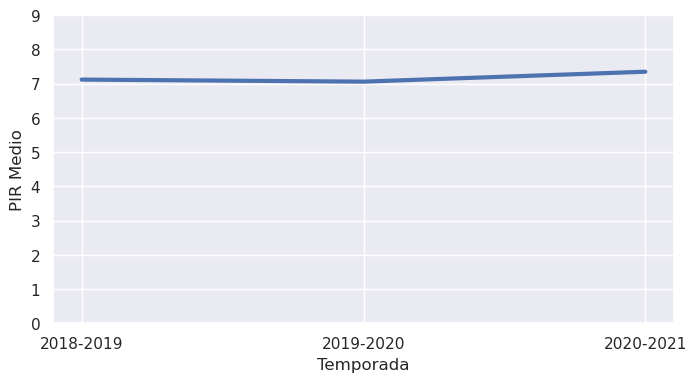

In [66]:
# Visualización - PIR medio por temporada

plt.figure(figsize = (8, 4))

media_pir = sns.lineplot(data = pir_temporada,
             x = 'temporada',
             y = 'pir_medio_total',
             linewidth = 3);

media_pir.set_yticks(np.arange(0,10, 1))
media_pir.set(xlabel='Temporada', ylabel='PIR Medio');

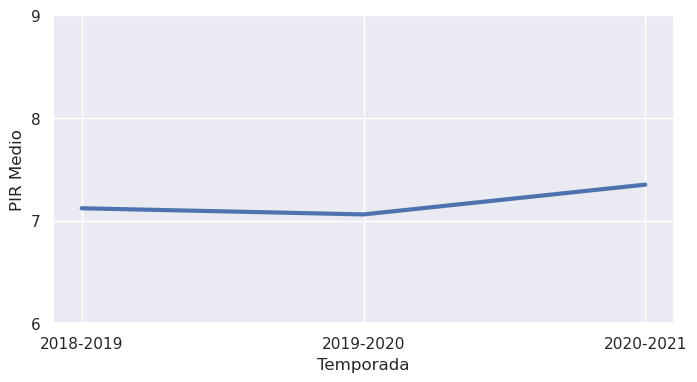

In [67]:
# Se amplia la visualización anterior

plt.figure(figsize = (8, 4))

media_pir = sns.lineplot(data = pir_temporada,
             x = 'temporada',
             y = 'pir_medio_total',
             linewidth = 3);

media_pir.set_yticks(np.arange(6,10, 1))
media_pir.set(xlabel='Temporada', ylabel='PIR Medio');

### **2.2. Correlación entre años de experiencia de cada jugador y PIR**

Se quiere calcular cuál es la correlación entre los años de experiencia de los jugadores de la NBA y su PIR medio, y saber si esta es significativa.

<div style="text-align: center"> 
$H_0$ = no existe correlación lineal entre la media de los años de experiencia de los jugadores de la NBA y su PIR medio
    
<div style="text-align: center">  
$H_1$ = existe correlación lineal entre la media de los años de experiencia de los jugadores de la NBA y su PIR medio

In [68]:
# Se calculan los años de experiencia en la NBA

df_nba['anios_experiencia'] = df_nba['anio'] - df_nba['draft_anio']
df_nba

/tmp/ipykernel_6984/2283522714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba['anios_experiencia'] = df_nba['anio'] - df_nba['draft_anio']


,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total,anios_experiencia
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero,21.98,4.0
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base,16.02,15.0
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero,26.73,8.0
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot,22.27,3.0
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base,16.09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,2022-2023,2022.0,1629644,KZ Okpala,2019,2.03,97.5,455,Sacramento,Kings,Western,35,0.4,0.2,2.200,1.086,0.457,42.1,0.229,0.200,87.5,0.600,0.200,33.3,1.3,7.1,0.8,0.2,1.0,1.1,0.2,0.2,13,7,2.200,38,16,42.1,8,7,87.5,21,7,33.3,248,46,27,7,34,7,7,39,0.0,Ala-Escolta,0.69,3.0
5817,2022-2023,2022.0,1631098,Johnny Davis,2022,1.93,88.5,457,Washington,Wizards,Eastern,13,0.2,0.1,1.100,1.385,0.462,33.3,0.231,0.077,100.0,0.308,0.077,25.0,1.2,4.8,0.5,0.1,0.6,1.0,0.1,0.2,2,1,1.100,18,6,33.3,3,3,100.0,4,1,25.0,62,16,7,1,8,2,1,13,0.0,Base,-0.15,0.0
5820,2022-2023,2022.0,1630556,Kessler Edwards,2021,2.01,92.1,460,Sacramento,Kings,Western,15,0.3,0.1,0.900,1.667,0.400,24.0,0.133,0.133,50.0,0.867,0.133,15.4,1.0,6.0,0.6,0.4,1.0,0.2,0.2,0.3,4,1,0.900,25,6,24.0,2,1,50.0,13,2,15.4,90,15,9,6,15,4,3,3,0.0,Alero,0.00,1.0
5826,2022-2023,2022.0,1631246,Vince Williams Jr.,2022,1.93,93.0,466,Memphis,Grizzlies,Western,9,0.3,0.1,1.200,1.444,0.333,23.1,0.000,0.111,0.0,1.000,0.111,11.1,0.8,5.4,0.6,0.2,0.8,0.7,0.4,0.1,3,1,1.200,13,3,23.1,0,0,0.0,9,1,11.1,49,7,5,2,7,1,4,6,0.0,Base,-0.33,0.0


In [69]:
'''
Se corrigen aquellos valores que se han calculado de forma errónea anteriormente, ya que en algunos casos
el año del draft era 0, asumiendo que los años de experiencia eran iguales al año de comienzo de 
la temporada, lo que es incorrecto.
'''

exp_list = list(df_nba['anios_experiencia'])

for index, value in enumerate(exp_list):
    if value > 2000:
        exp_list[index] = 0
        
df_nba['anios_experiencia'] = exp_list
df_nba

/tmp/ipykernel_6984/3972325162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba['anios_experiencia'] = exp_list


,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total,anios_experiencia
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero,21.98,4.0
1,2011-2012,2011.0,977,Kobe Bryant,1996,1.98,93.0,2,Los Angeles,Lakers,Western,58,4.6,0.3,21.448,23.034,9.897,43.0,7.776,1.500,84.5,4.948,1.500,30.3,27.9,38.5,4.3,1.1,5.4,1.8,1.1,3.5,264,18,21.448,1336,574,43.0,451,381,84.5,287,87,30.3,2232,1616,247,66,313,204,69,105,10.0,Base,16.02,15.0
2,2011-2012,2011.0,2544,LeBron James,2003,2.03,113.4,3,Miami,Heat,Eastern,62,6.2,0.8,29.855,18.855,10.016,53.1,8.097,0.871,77.1,2.403,0.871,36.2,27.1,37.5,6.4,1.5,7.9,1.5,1.8,3.4,387,50,29.855,1169,621,53.1,502,387,77.1,149,54,36.2,2326,1683,398,94,492,213,115,96,3.0,Alero,26.73,8.0
3,2011-2012,2011.0,201567,Kevin Love,2008,2.08,117.9,4,Minnesota,Timberwolves,Western,55,2.0,0.5,28.327,19.255,8.618,44.8,8.364,1.909,82.4,5.127,1.909,37.2,26.0,39.0,9.2,4.1,13.3,2.8,0.8,2.3,111,28,28.327,1059,474,44.8,460,379,82.4,282,105,37.2,2145,1432,508,226,734,128,47,152,4.0,Ala-Pivot,22.27,3.0
4,2011-2012,2011.0,201566,Russell Westbrook,2008,1.91,84.8,5,Oklahoma City,Thunder,Western,66,5.5,0.3,20.515,19.182,8.758,45.7,6.258,0.939,82.3,2.970,0.939,31.6,23.6,35.3,3.1,1.5,4.6,2.2,1.7,3.6,362,21,20.515,1266,578,45.7,413,340,82.3,196,62,31.6,2331,1558,205,96,301,239,112,147,11.0,Base,16.09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,2022-2023,2022.0,1629644,KZ Okpala,2019,2.03,97.5,455,Sacramento,Kings,Western,35,0.4,0.2,2.200,1.086,0.457,42.1,0.229,0.200,87.5,0.600,0.200,33.3,1.3,7.1,0.8,0.2,1.0,1.1,0.2,0.2,13,7,2.200,38,16,42.1,8,7,87.5,21,7,33.3,248,46,27,7,34,7,7,39,0.0,Ala-Escolta,0.69,3.0
5817,2022-2023,2022.0,1631098,Johnny Davis,2022,1.93,88.5,457,Washington,Wizards,Eastern,13,0.2,0.1,1.100,1.385,0.462,33.3,0.231,0.077,100.0,0.308,0.077,25.0,1.2,4.8,0.5,0.1,0.6,1.0,0.1,0.2,2,1,1.100,18,6,33.3,3,3,100.0,4,1,25.0,62,16,7,1,8,2,1,13,0.0,Base,-0.15,0.0
5820,2022-2023,2022.0,1630556,Kessler Edwards,2021,2.01,92.1,460,Sacramento,Kings,Western,15,0.3,0.1,0.900,1.667,0.400,24.0,0.133,0.133,50.0,0.867,0.133,15.4,1.0,6.0,0.6,0.4,1.0,0.2,0.2,0.3,4,1,0.900,25,6,24.0,2,1,50.0,13,2,15.4,90,15,9,6,15,4,3,3,0.0,Alero,0.00,1.0
5826,2022-2023,2022.0,1631246,Vince Williams Jr.,2022,1.93,93.0,466,Memphis,Grizzlies,Western,9,0.3,0.1,1.200,1.444,0.333,23.1,0.000,0.111,0.0,1.000,0.111,11.1,0.8,5.4,0.6,0.2,0.8,0.7,0.4,0.1,3,1,1.200,13,3,23.1,0,0,0.0,9,1,11.1,49,7,5,2,7,1,4,6,0.0,Base,-0.33,0.0


In [70]:
# Se calcula la correlación lineal entre los años de experiencia de los jugadores y su PIR medio total 

anios_exp = df_nba['anios_experiencia']
pir_medio_total = df_nba['pir_medio_total']

pearsonr(anios_exp, pir_medio_total)

(0.1801708960924297, 6.53576700212898e-41)

### Conclusión

El estadístico obtenido es 0.2017, lo que significa que las variables "años de experiencia" (por jugador) y "PIR medio total" no están relacionadas a través de una correlación lineal. Por tanto, no se puede decir que estas variables se encuentren relacionadas, al menos de forma lineal.

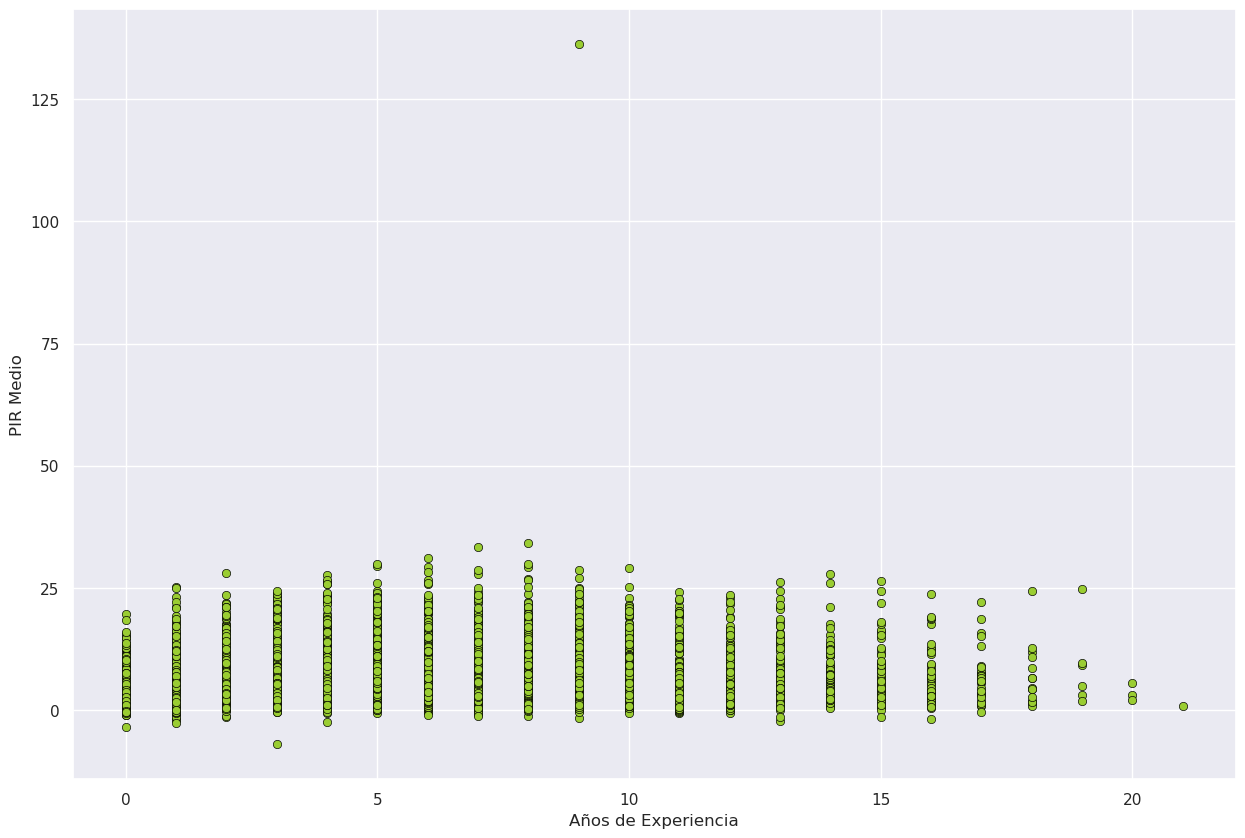

In [78]:
# Visualización - Cómo se distribuye el PIR medio en base a los años de experiencia de los jugadores

plt.figure(figsize = (15, 10))

pir_exp = sns.scatterplot(x = 'anios_experiencia',
                y = 'pir_medio_total',
                color = 'yellowgreen',
                edgecolor = 'black',
                data = df_nba);

pir_exp.set_yticks(np.arange(0,150, 25))
pir_exp.set_xlabel("Años de Experiencia");
pir_exp.set_ylabel("PIR Medio");

# Se comprueba si existe o no una relación entre las variables
# Se observa un outlier

### **2.3. Correlación entre años de experiencia media del equipo y PIR**

Se quiere calcular si existe correlación entre los años de experiencia del equipo y el PIR medio, y saber si esta es significativa.

<div style="text-align: center"> 
$H_0$ = no existe correlación lineal entre los años de experiencia media del equipo y su PIR medio
    
<div style="text-align: center">  
$H_1$ = existe correlación lineal entre los años de experiencia media del equipo y su PIR medio

In [79]:
# Se agrupan los años de experiencia y el PIR medio por equipo y por temporada

teams = round((df_nba.groupby([df_nba['temporada'], df_nba['nombre_equipo']]).mean()), 2)
teams[['anios_experiencia', 'pir_medio_total']]

anios_experiencia  pir_medio_total
temporada nombre_equipo                                    
2011-2012 76ers                       4.62             7.44
          Bobcats                     4.44             5.06
          Bucks                       5.15             6.78
          Bulls                       6.00             7.46
          Cavaliers                   3.16             5.37
...                                    ...              ...
2022-2023 Thunder                     1.93             7.36
          Timberwolves                4.53             7.12
          Trail Blazers               4.00             6.97
          Warriors                    5.27             7.53
          Wizards                     5.29             7.97

[360 rows x 2 columns]

In [80]:
# Se eliminan los índices definidos

teams.reset_index(inplace = True)
teams_exper = teams[['temporada', 'nombre_equipo', 'anios_experiencia', 'pir_medio_total']]
teams_exper

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
0,2011-2012,76ers,4.62,7.44
1,2011-2012,Bobcats,4.44,5.06
2,2011-2012,Bucks,5.15,6.78
3,2011-2012,Bulls,6.00,7.46
4,2011-2012,Cavaliers,3.16,5.37
...,...,...,...,...
355,2022-2023,Thunder,1.93,7.36
356,2022-2023,Timberwolves,4.53,7.12
357,2022-2023,Trail Blazers,4.00,6.97
358,2022-2023,Warriors,5.27,7.53


In [84]:
# Se calcula la correlación entre la media de los años de experiencia del equipo y su PIR medio

anios_exp_team = teams_exper['anios_experiencia']
pir_medio_team = teams_exper['pir_medio_total']

pearsonr(anios_exp_team, pir_medio_team)

(0.2151449716794188, 3.8517865159642634e-05)

### Conclusión

El estadístico obtenido es 0.2727, lo que significa que las variables "años de experiencia" media (por equipo) y "PIR medio total" no están relacionadas a través de una correlación lineal. Por tanto, no se puede decir que estas variables se encuentren relacionadas, al menos de forma lineal.

A continuación se van a visualizar con plotly como se relacionan la media de los años de experiencia de los equipos con su PIR medio por temporada

In [92]:
# Temporada 2011-2012

teams_2011 = teams_exper.loc[(teams_exper.temporada == '2011-2012')]
teams_2011

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
0,2011-2012,76ers,4.62,7.44
1,2011-2012,Bobcats,4.44,5.06
2,2011-2012,Bucks,5.15,6.78
3,2011-2012,Bulls,6.00,7.46
4,2011-2012,Cavaliers,3.16,5.37
5,2011-2012,Celtics,7.87,6.51
6,2011-2012,Clippers,6.06,5.52
7,2011-2012,Grizzlies,4.07,6.09
8,2011-2012,Hawks,8.00,6.67
9,2011-2012,Heat,6.47,6.46


In [109]:
# Visualización - Temporada 2011-2012

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2011['nombre_equipo'], y = teams_2011.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2011['nombre_equipo'], y = teams_2011.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [93]:
# Temporada 2012-2013

teams_2012 = teams_exper.loc[(teams_exper.temporada == '2012-2013')]
teams_2012

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
30,2012-2013,76ers,4.86,6.34
31,2012-2013,Bobcats,4.31,6.06
32,2012-2013,Bucks,5.73,6.84
33,2012-2013,Bulls,7.17,7.35
34,2012-2013,Cavaliers,3.25,5.65
35,2012-2013,Celtics,6.59,6.15
36,2012-2013,Clippers,8.92,7.23
37,2012-2013,Grizzlies,4.33,6.22
38,2012-2013,Hawks,5.57,7.11
39,2012-2013,Heat,9.33,6.86


In [110]:
# Visualización - Temporada 2012-2013

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2012['nombre_equipo'], y = teams_2012.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2012['nombre_equipo'], y = teams_2012.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [94]:
# Temporada 2013-2014

teams_2013 = teams_exper.loc[(teams_exper.temporada == '2013-2014')]
teams_2013

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
60,2013-2014,76ers,2.13,5.37
61,2013-2014,Bobcats,4.47,6.76
62,2013-2014,Bucks,4.13,6.31
63,2013-2014,Bulls,6.13,6.20
64,2013-2014,Cavaliers,3.43,6.38
65,2013-2014,Celtics,4.19,5.91
66,2013-2014,Clippers,8.20,6.77
67,2013-2014,Grizzlies,5.93,7.06
68,2013-2014,Hawks,3.81,6.76
69,2013-2014,Heat,9.60,6.81


In [111]:
# Visualización - Temporada 2013-2014

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2013['nombre_equipo'], y = teams_2013.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2013['nombre_equipo'], y = teams_2013.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [95]:
# Temporada 2014-2015

teams_2014 = teams_exper.loc[(teams_exper.temporada == '2014-2015')]
teams_2014

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
90,2014-2015,76ers,2.67,4.28
91,2014-2015,Bucks,4.06,6.46
92,2014-2015,Bulls,6.21,7.11
93,2014-2015,Cavaliers,7.38,6.66
94,2014-2015,Celtics,3.93,5.71
95,2014-2015,Clippers,6.95,5.26
96,2014-2015,Grizzlies,6.13,6.50
97,2014-2015,Hawks,5.00,7.14
98,2014-2015,Heat,6.76,6.31
99,2014-2015,Hornets,4.88,6.09


In [99]:
# Visualización - Temporada 2014-2015

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2014['nombre_equipo'], y = teams_2014.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2014['nombre_equipo'], y = teams_2014.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [100]:
# Temporada 2015-2016

teams_2015 = teams_exper.loc[(teams_exper.temporada == '2015-2016')]
teams_2015

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
120,2015-2016,76ers,2.20,5.03
121,2015-2016,Bucks,3.53,6.83
122,2015-2016,Bulls,6.07,7.40
123,2015-2016,Cavaliers,8.23,7.02
124,2015-2016,Celtics,4.42,7.62
125,2015-2016,Clippers,8.14,7.79
126,2015-2016,Grizzlies,8.15,6.98
127,2015-2016,Hawks,4.93,6.64
128,2015-2016,Heat,7.80,7.93
129,2015-2016,Hornets,4.93,7.07


In [101]:
# Visualización - Temporada 2015-2016

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2015['nombre_equipo'], y = teams_2015.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2015['nombre_equipo'], y = teams_2015.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [102]:
# Temporada 2016-2017

teams_2016 = teams_exper.loc[(teams_exper.temporada == '2016-2017')]
teams_2016

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
150,2016-2017,76ers,3.13,7.00
151,2016-2017,Bucks,4.60,7.40
152,2016-2017,Bulls,4.20,6.32
153,2016-2017,Cavaliers,8.92,8.06
154,2016-2017,Celtics,4.71,6.81
155,2016-2017,Clippers,9.92,7.69
156,2016-2017,Grizzlies,5.93,6.00
157,2016-2017,Hawks,6.87,6.69
158,2016-2017,Heat,5.36,7.10
159,2016-2017,Hornets,4.73,6.63


In [103]:
# Visualización - Temporada 2016-2017

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2016['nombre_equipo'], y = teams_2016.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2016['nombre_equipo'], y = teams_2016.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [104]:
# Temporada 2017-2018

teams_2017 = teams_exper.loc[(teams_exper.temporada == '2017-2018')]
teams_2017

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
180,2017-2018,76ers,4.53,6.82
181,2017-2018,Bucks,4.71,6.88
182,2017-2018,Bulls,2.94,5.88
183,2017-2018,Cavaliers,6.76,6.71
184,2017-2018,Celtics,3.31,6.64
185,2017-2018,Clippers,5.35,6.93
186,2017-2018,Grizzlies,3.71,5.62
187,2017-2018,Hawks,2.18,5.65
188,2017-2018,Heat,5.35,6.55
189,2017-2018,Hornets,4.87,6.91


In [105]:
# Visualización - Temporada 2017-2018

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2017['nombre_equipo'], y = teams_2017.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2017['nombre_equipo'], y = teams_2017.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [112]:
# Temporada 2018-2019

teams_2018 = teams_exper.loc[(teams_exper.temporada == '2018-2019')]
teams_2018

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
210,2018-2019,76ers,5.25,8.50
211,2018-2019,Bucks,5.75,8.48
212,2018-2019,Bulls,2.44,7.14
213,2018-2019,Cavaliers,4.76,6.04
214,2018-2019,Celtics,4.53,7.44
215,2018-2019,Clippers,4.80,6.71
216,2018-2019,Grizzlies,4.83,5.96
217,2018-2019,Hawks,3.53,6.21
218,2018-2019,Heat,6.77,6.81
219,2018-2019,Hornets,5.73,7.21


In [113]:
# Visualización - Temporada 2018-2019

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2018['nombre_equipo'], y = teams_2018.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2018['nombre_equipo'], y = teams_2018.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [114]:
# Temporada 2019-2020

teams_2019 = teams_exper.loc[(teams_exper.temporada == '2019-2020')]
teams_2019

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
240,2019-2020,76ers,5.00,8.41
241,2019-2020,Bucks,7.81,7.49
242,2019-2020,Bulls,3.31,6.26
243,2019-2020,Cavaliers,3.93,7.89
244,2019-2020,Celtics,3.75,6.88
245,2019-2020,Clippers,6.19,7.48
246,2019-2020,Grizzlies,3.06,7.30
247,2019-2020,Hawks,4.00,7.95
248,2019-2020,Heat,4.86,7.79
249,2019-2020,Hornets,3.00,6.82


In [115]:
# Visualización - Temporada 2019-2020

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2019['nombre_equipo'], y = teams_2019.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2019['nombre_equipo'], y = teams_2019.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [116]:
# Temporada 2020-2021

teams_2020 = teams_exper.loc[(teams_exper.temporada == '2020-2021')]
teams_2020

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
270,2020-2021,76ers,5.65,7.09
271,2020-2021,Bucks,5.88,7.80
272,2020-2021,Bulls,5.29,7.12
273,2020-2021,Cavaliers,2.88,6.11
274,2020-2021,Celtics,3.79,7.52
275,2020-2021,Clippers,7.00,7.60
276,2020-2021,Grizzlies,2.59,6.93
277,2020-2021,Hawks,4.06,7.88
278,2020-2021,Heat,5.93,8.12
279,2020-2021,Hornets,3.40,7.50


In [117]:
# Visualización - Temporada 2020-2021

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2020['nombre_equipo'], y = teams_2020.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2020['nombre_equipo'], y = teams_2020.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [118]:
# Temporada 2021-2022

teams_2021 = teams_exper.loc[(teams_exper.temporada == '2021-2022')]
teams_2021

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
300,2021-2022,76ers,5.62,7.29
301,2021-2022,Bucks,6.88,7.89
302,2021-2022,Bulls,4.94,8.14
303,2021-2022,Cavaliers,4.35,7.41
304,2021-2022,Celtics,3.93,7.63
305,2021-2022,Clippers,5.53,7.69
306,2021-2022,Grizzlies,2.62,7.61
307,2021-2022,Hawks,4.94,7.28
308,2021-2022,Heat,6.41,7.10
309,2021-2022,Hornets,3.87,7.92


In [119]:
# Visualización - Temporada 2021 - 2022

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2021['nombre_equipo'], y = teams_2021.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2021['nombre_equipo'], y = teams_2021.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

In [120]:
# Temporada 2022-2023

teams_2022 = teams_exper.loc[(teams_exper.temporada == '2022-2023')]
teams_2022

,temporada,nombre_equipo,anios_experiencia,pir_medio_total
330,2022-2023,76ers,6.93,8.70
331,2022-2023,Bucks,7.36,7.50
332,2022-2023,Bulls,6.75,8.62
333,2022-2023,Cavaliers,6.60,7.27
334,2022-2023,Celtics,6.31,9.26
335,2022-2023,Clippers,6.56,8.19
336,2022-2023,Grizzlies,2.81,7.58
337,2022-2023,Hawks,3.53,8.30
338,2022-2023,Heat,4.43,7.59
339,2022-2023,Hornets,3.33,6.33


In [121]:
# Visualización - Temporada 2022-2023

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = teams_2022['nombre_equipo'], y = teams_2022.anios_experiencia,
                    mode = 'lines',
                    name = 'Años de Experiencia'))

fig.add_trace(go.Scatter(x = teams_2022['nombre_equipo'], y = teams_2022.pir_medio_total,
                    mode = 'lines',
                    name = 'PIR Medio'))
fig.show()

### **2.3. Relación entre altura, peso y PIR**

Se quiere entender cuál es la relación entre la altura, el peso y el PIR de los jugadores.

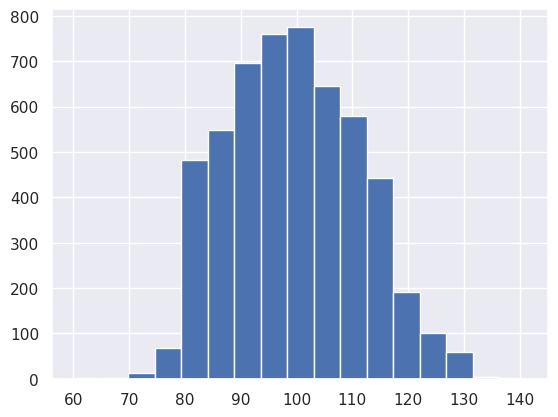

In [122]:
# Histograma del peso

df_nba.peso_kg.hist(bins = 17);

In [123]:
# Se calcula la media del peso por cada temporada

peso_temp = round((df_nba.loc[:,['temporada', 'peso_kg']].groupby(df_nba['temporada']).mean()), 2)
peso_temp.reset_index(inplace = True)
peso_temp

,temporada,peso_kg
0,2011-2012,101.04
1,2012-2013,100.85
2,2013-2014,100.71
3,2014-2015,100.47
4,2015-2016,100.83
5,2016-2017,99.89
6,2017-2018,99.08
7,2018-2019,98.89
8,2019-2020,98.89
9,2020-2021,98.37


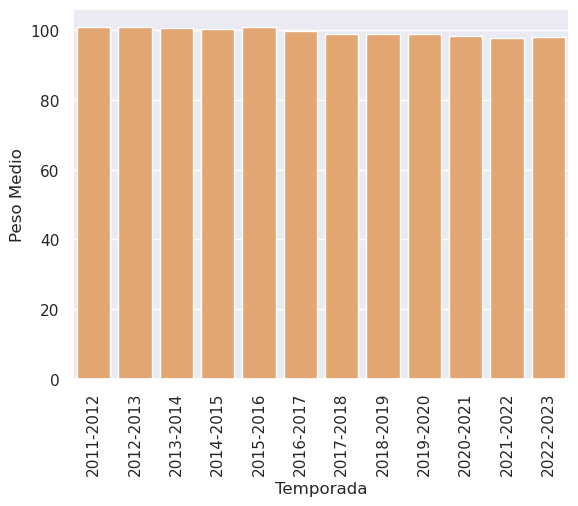

In [124]:
# Se visualiza para ver si hay diferencias

peso = sns.barplot(x = peso_temp['temporada'], 
                   y = peso_temp['peso_kg'],
                   data = peso_temp, 
                   color = 'sandybrown');



peso.set_xticklabels(peso_temp['temporada'], rotation = 90)

peso.set(xlabel='Temporada', ylabel='Peso Medio');

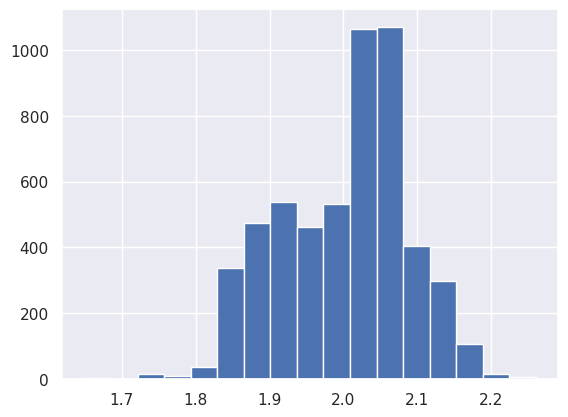

In [125]:
# Histograma de la altura

df_nba.altura.hist(bins = 17);

In [126]:
# Se calcula la media de la altura por cada temporada y se visualiza para ver si hay diferencias

altura_temp = round((df_nba.loc[:,['temporada', 'altura']].groupby(df_nba['temporada']).mean()), 2)
altura_temp.reset_index(inplace = True)
altura_temp

,temporada,altura
0,2011-2012,2.01
1,2012-2013,2.01
2,2013-2014,2.01
3,2014-2015,2.01
4,2015-2016,2.01
5,2016-2017,2.01
6,2017-2018,2.00
7,2018-2019,2.01
8,2019-2020,1.99
9,2020-2021,1.99


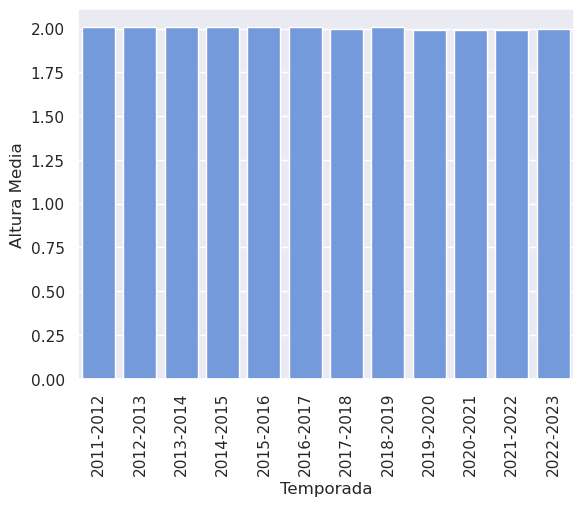

In [127]:
# Se visualiza para ver si hay diferencias

altura = sns.barplot(x = altura_temp['temporada'], 
                     y = altura_temp['altura'],
                     data = altura_temp, 
                     color = 'cornflowerblue');



altura.set_xticklabels(altura_temp['temporada'], rotation = 90)

altura.set(xlabel='Temporada', ylabel='Altura Media');

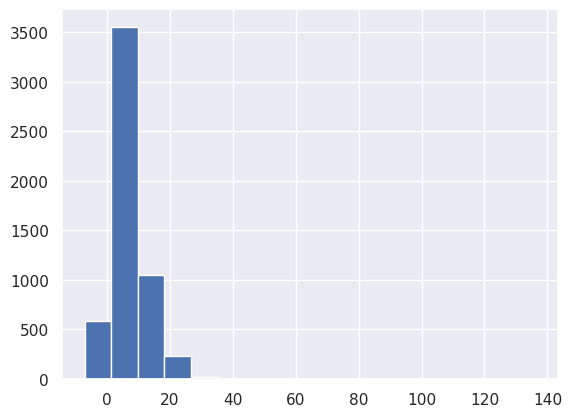

In [128]:
# Histograma del PIR medio

df_nba.pir_medio_total.hist(bins = 17);

/tmp/ipykernel_6984/2133469563.py:21: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



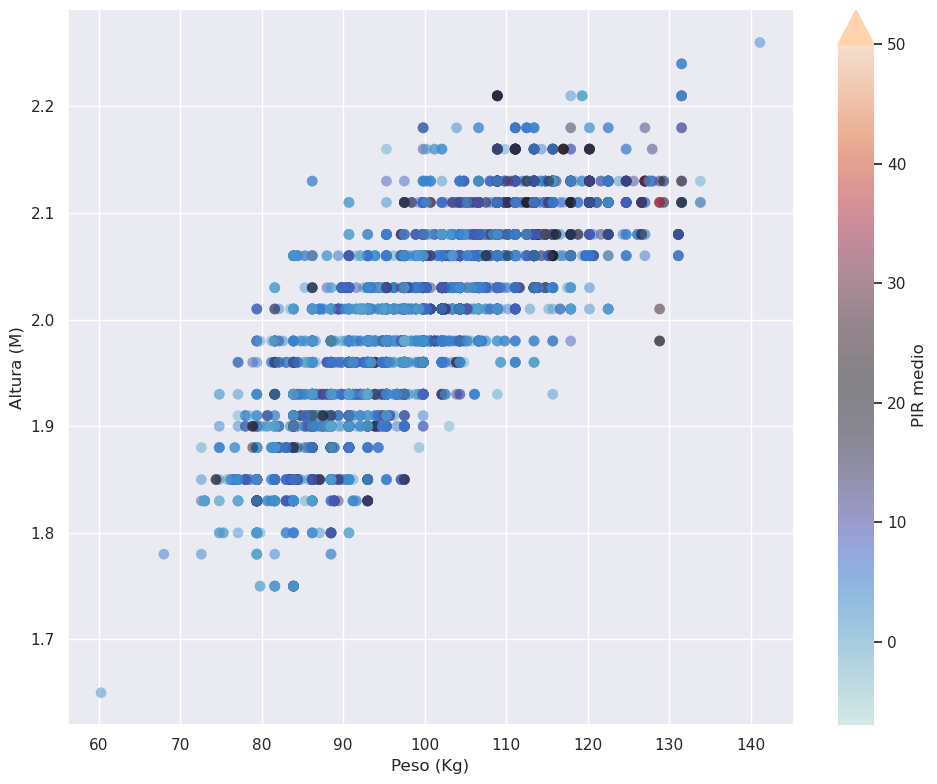

In [129]:
# Visualización - Relación peso, altura, PIR medio

fig, ax = plt.subplots(figsize=(10, 8), dpi=100)


x = df_nba['peso_kg']
y = df_nba['altura'] 
colors = df_nba['pir_medio_total']


p = ax.scatter(x, y,
               s= 60,  
               c = colors, 
               cmap='icefire',
               vmin= colors.min(), 
               vmax= 50, 
               alpha= 0.5,
               edgecolors='none')


cb = fig.colorbar(p, ax = ax, label='PIR medio', extend='max') 

cb.outline.set_visible(False)

ax.set_xlabel('Peso (Kg)')
ax.set_ylabel('Altura (M)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()

### **2.4. Comparación de las puntuaciones por partido de los número 1 del ranking del 2014 al 2023**


In [130]:
# Se crea un DataFrame que contenga a los jugadores de la NBA que han sido número 1 en el ranking

num_1 = df_nba.loc[data_nba['num_ranking'] == 1]
num_1

,temporada,anio,id_jugador,nombre_jugador,draft_anio,altura,peso_kg,num_ranking,ciudad_equipo,nombre_equipo,conferencia,partidos_jugados,asistencias_pp,tapones_pp,eficiencia_tiro_pp,tci_pp,tce_pp,porcentaje_tc_pp,tli_pp,tle_pp,porcentaje_tl_pp,tti_pp,tte_pp,porcentaje_tt_pp,puntos_pp,minutos_pp,reb_def_pp,reb_of_pp,total_rebotes_pp,faltas_pp,robos_pp,perdidas_pp,asistencias_total,tapones_total,eficiencia_tiro_total,tci_total,tce_total,porcentaje_tc_total,tli_total,tle_total,porcentaje_tl_total,tti_total,tte_total,porcentaje_tt_total,minutos_total,puntos_total,reb_def_total,reb_of_total,rebotes_total,perdidas_total,robos_total,faltas_total,faltas_tecnicas_total,posicion_juego,pir_medio_total,anios_experiencia
0,2011-2012,2011.0,201142,Kevin Durant,2007,2.06,106.6,1,Oklahoma City,Thunder,Western,66,3.5,1.1,27.288,19.652,9.742,49.6,7.591,2.015,86.0,5.212,2.015,38.7,28.0,38.6,7.4,0.6,8.0,2.0,1.3,3.7,231,77,27.288,1297,643,49.6,501,431,86.0,344,133,38.7,2546,1850,487,40,527,248,88,133,6.0,Alero,21.98,4.0
480,2012-2013,2012.0,2546,Carmelo Anthony,2003,2.03,104.3,1,New York,Knicks,Eastern,67,2.6,0.4,23.200,22.224,9.985,44.9,7.642,2.343,83.0,6.179,2.343,37.9,28.7,37.0,4.9,2.0,6.9,3.1,0.7,2.6,171,32,23.200,1489,669,44.9,512,425,83.0,414,157,37.9,2482,1920,326,134,460,175,52,205,16.0,Alero,16.04,9.0
959,2013-2014,2013.0,201142,Kevin Durant,2007,2.06,108.9,1,Oklahoma City,Thunder,Western,81,5.5,0.7,31.800,20.840,10.481,50.3,9.938,2.370,87.3,6.062,2.370,39.1,32.0,38.5,6.7,0.7,7.4,2.1,1.2,3.5,445,59,31.800,1688,849,50.3,805,703,87.3,491,192,39.1,3122,2593,540,58,598,285,103,174,16.0,Alero,25.72,6.0
1449,2014-2015,2014.0,201566,Russell Westbrook,2008,1.90,90.7,1,Oklahoma City,Thunder,Western,67,8.6,0.2,27.700,21.955,9.358,42.6,9.761,1.284,83.5,4.299,1.284,29.9,28.1,34.4,5.4,1.9,7.3,2.7,2.1,4.4,574,14,27.700,1471,627,42.6,654,546,83.5,288,86,29.9,2302,1886,364,124,488,293,140,184,17.0,Base,21.70,6.0
1944,2015-2016,2015.0,201939,Stephen Curry,2009,1.90,86.2,1,Golden State,Warriors,Western,79,6.7,0.2,30.700,20.228,10.190,50.4,5.063,5.089,90.8,11.215,5.089,45.4,30.1,34.2,4.6,0.9,5.4,2.0,2.1,3.3,527,15,30.700,1598,805,50.4,400,363,90.8,886,402,45.4,2700,2375,362,68,430,262,169,161,3.0,Base,22.48,6.0
2358,2016-2017,2016.0,201566,Russell Westbrook,2008,1.91,90.7,1,Oklahoma City,Thunder,Western,81,10.4,0.4,33.800,23.963,10.173,42.5,10.370,2.469,84.5,7.198,2.469,34.3,31.6,34.6,9.0,1.7,10.7,2.3,1.6,5.4,840,31,33.800,1941,824,42.5,840,710,84.5,583,200,34.3,2802,2558,727,137,864,438,132,190,17.0,Base,26.54,8.0
2809,2017-2018,2017.0,201935,James Harden,2009,1.96,99.8,1,Houston,Rockets,Western,72,8.8,0.7,30.100,20.125,9.042,44.9,10.097,3.681,85.8,10.028,3.681,36.7,30.4,35.4,4.8,0.6,5.4,2.3,1.8,4.4,630,50,30.100,1449,651,44.9,727,624,85.8,722,265,36.7,2551,2191,348,41,389,315,126,169,7.0,Base,21.35,8.0
3357,2018-2019,2018.0,201935,James Harden,2009,1.96,99.8,1,Houston,Rockets,Western,78,7.5,0.7,33.100,24.474,10.808,44.2,11.000,4.846,87.9,13.179,4.846,36.8,36.1,36.8,5.8,0.8,6.6,3.1,2.0,5.0,586,58,33.100,1909,843,44.2,858,754,87.9,1028,378,36.8,2867,2818,452,66,518,387,158,244,8.0,Base,21.53,9.0
3855,2019-2020,2019.0,201935,James Harden,2009,1.96,99.8,1,Houston,Rockets,Western,68,7.5,0.9,32.600,22.265,9.882,44.4,11.765,4.397,86.5,12.397,4.397,35.5,34.3,36.5,5.5,1.0,6.6,3.3,1.8,4.5,512,60,32.600,1514,672,44.4,800,692,86.5,843,299,35.5,2483,2335,376,70,446,308,125,227,5.0,Base,21.24,10.0
4365,2020-2021,2020.0,201939,Stephen Curry,2009,1.90,83.9,1,Golden State,Warriors,Western,63,5.8,0.1,29.400,21.667,10.444,48.2,6.270,5.349,91.6,12.714,5.349,42.1,32.0,34.2,5.0,0.5,5.5,1.9,1.2,3.4,363,8,29.400,1365,658,48.2,395,362,91.6,801,337,42.1,2152,2015,316,29,345,213,77,119,1.0,Base,20.17,11.0


In [131]:
num1_data = num_1.loc[:, ['temporada', 
              'nombre_jugador',
              'partidos_jugados', 
              'asistencias_pp', 
              'total_rebotes_pp', 
              'eficiencia_tiro_pp',
              'puntos_pp', 
              'pir_medio_total']]


# Se elimina la temporada actual porque están en mitad de la misma y los datos de la misma aparecerían como outliers

num1_data = num1_data.loc[num1_data.temporada != '2022-2023']
num1_data

,temporada,nombre_jugador,partidos_jugados,asistencias_pp,total_rebotes_pp,eficiencia_tiro_pp,puntos_pp,pir_medio_total
0,2011-2012,Kevin Durant,66,3.5,8.0,27.288,28.0,21.98
480,2012-2013,Carmelo Anthony,67,2.6,6.9,23.200,28.7,16.04
959,2013-2014,Kevin Durant,81,5.5,7.4,31.800,32.0,25.72
1449,2014-2015,Russell Westbrook,67,8.6,7.3,27.700,28.1,21.70
1944,2015-2016,Stephen Curry,79,6.7,5.4,30.700,30.1,22.48
2358,2016-2017,Russell Westbrook,81,10.4,10.7,33.800,31.6,26.54
2809,2017-2018,James Harden,72,8.8,5.4,30.100,30.4,21.35
3357,2018-2019,James Harden,78,7.5,6.6,33.100,36.1,21.53
3855,2019-2020,James Harden,68,7.5,6.6,32.600,34.3,21.24
4365,2020-2021,Stephen Curry,63,5.8,5.5,29.400,32.0,20.17


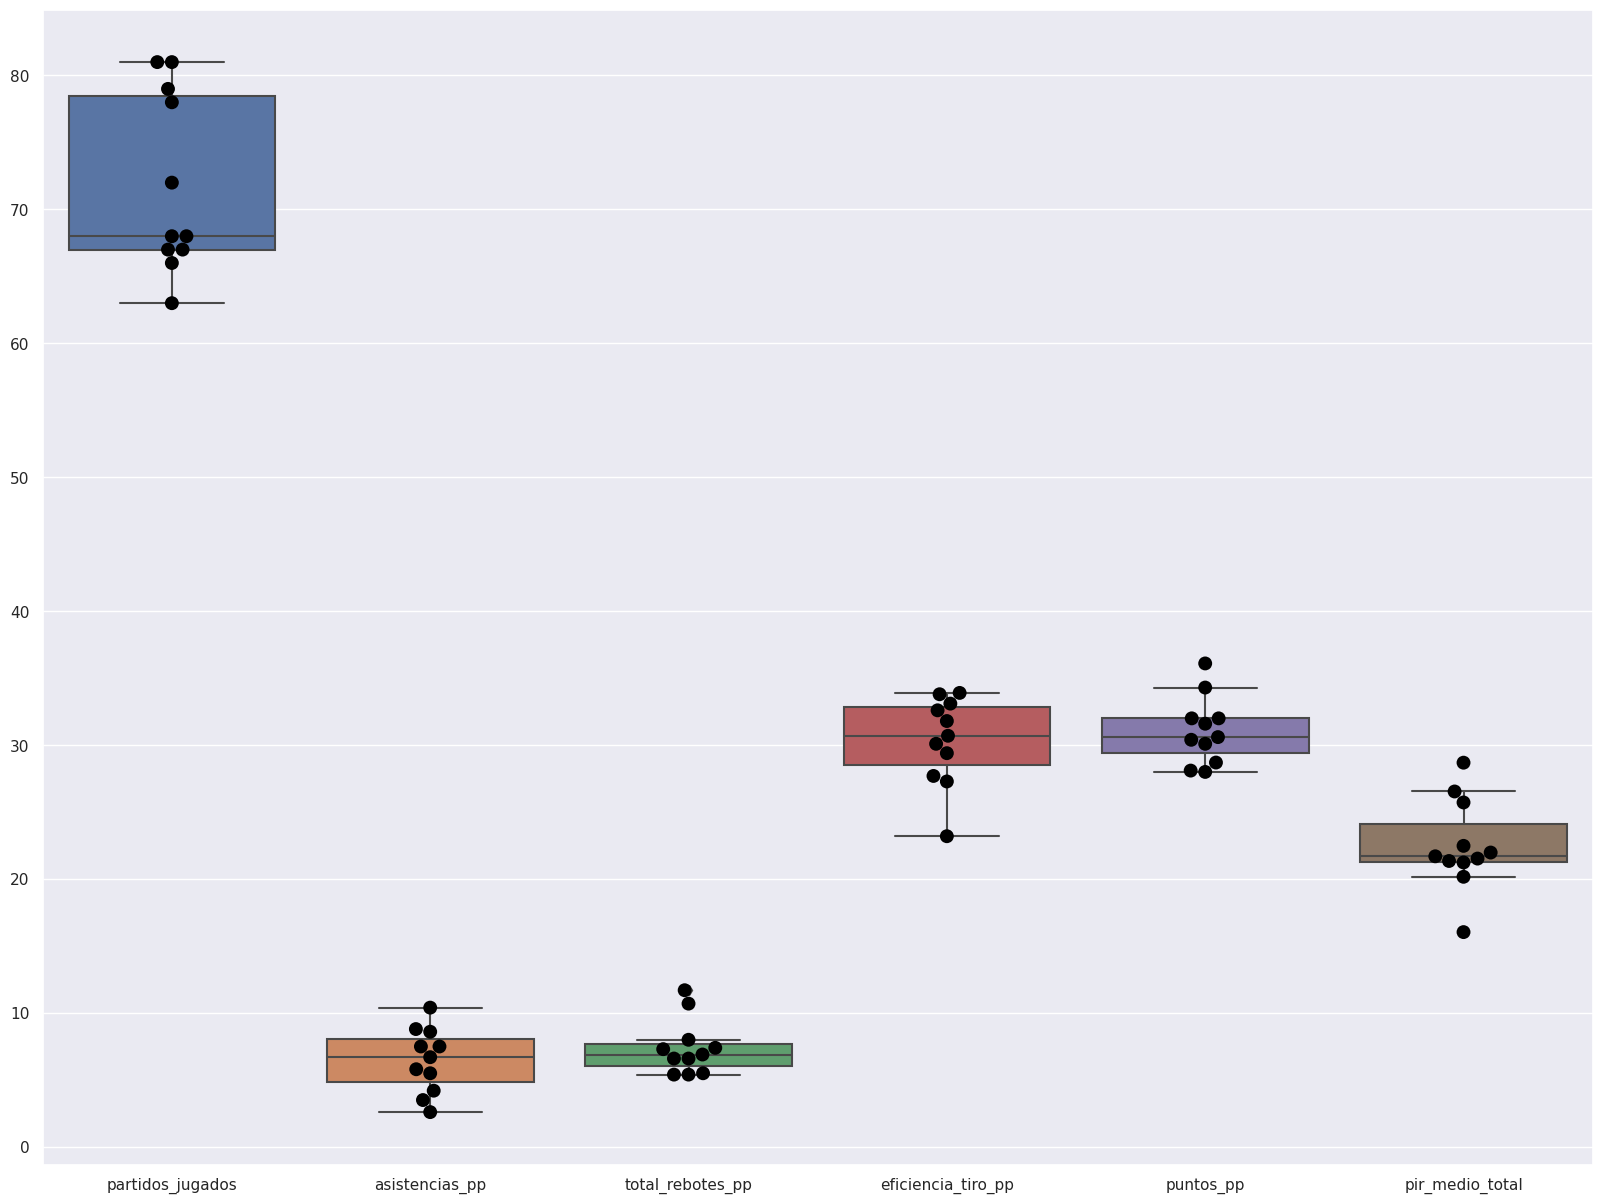

In [132]:
# Visualización - Cómo se distribuyen las puntuaciones de cada una de las categorías por temporada

plt.figure(figsize = (20, 15))

sns.boxplot(data = num1_data.loc[:, ['partidos_jugados', 
                                      'asistencias_pp', 
                                      'total_rebotes_pp', 
                                      'eficiencia_tiro_pp',
                                      'puntos_pp',
                                      'pir_medio_total']])

sns.swarmplot(data = num1_data.loc[:, ['partidos_jugados', 
                                        'asistencias_pp', 
                                        'total_rebotes_pp', 
                                        'eficiencia_tiro_pp',
                                        'puntos_pp', 
                                        'pir_medio_total']], color = 'black', s = 10);

In [133]:
num1_data

,temporada,nombre_jugador,partidos_jugados,asistencias_pp,total_rebotes_pp,eficiencia_tiro_pp,puntos_pp,pir_medio_total
0,2011-2012,Kevin Durant,66,3.5,8.0,27.288,28.0,21.98
480,2012-2013,Carmelo Anthony,67,2.6,6.9,23.200,28.7,16.04
959,2013-2014,Kevin Durant,81,5.5,7.4,31.800,32.0,25.72
1449,2014-2015,Russell Westbrook,67,8.6,7.3,27.700,28.1,21.70
1944,2015-2016,Stephen Curry,79,6.7,5.4,30.700,30.1,22.48
2358,2016-2017,Russell Westbrook,81,10.4,10.7,33.800,31.6,26.54
2809,2017-2018,James Harden,72,8.8,5.4,30.100,30.4,21.35
3357,2018-2019,James Harden,78,7.5,6.6,33.100,36.1,21.53
3855,2019-2020,James Harden,68,7.5,6.6,32.600,34.3,21.24
4365,2020-2021,Stephen Curry,63,5.8,5.5,29.400,32.0,20.17


In [137]:
# Visualización - Puntuaciones de cada categoría por partido de cada jugador nº 1 por temporada

import plotly.graph_objects as go

categories = ['Partidos Jugados', 'Asistencias por Partido', 
              'Rebotes por Partido', 'Eficiencia de Tiro por Partido', 
              'Puntos por Partido', 'PIR Medio por Partido']

fig = go.Figure()


fig.add_trace(go.Scatterpolar(r = [66, 3.5, 8.0, 27.288, 28.0, 21.98],
                              theta = categories,
                              fill = 'toself',
                              name ='Kevin Durant_2011-2012'))
                              
fig.add_trace(go.Scatterpolar(r = [67, 2.6, 6.9, 23.20, 28.7, 16.04],
                              theta = categories,
                              fill = 'toself',
                              name ='Carmelo Anthony_2012-2013'))
                              
                              
fig.add_trace(go.Scatterpolar(r = [81, 5.5, 7.4, 31.8, 32.0, 25.72],
                              theta = categories,
                              fill = 'toself',
                              name = 'Kevin Durant_2013-2014'))


fig.add_trace(go.Scatterpolar(r = [67, 8.6, 0.2, 27.7, 28.1, 21.70],
                              theta = categories,
                              fill = 'toself',
                              name ='Russell Westbrook_2014-2015'))

fig.add_trace(go.Scatterpolar(r = [79, 6.7, 0.2, 30.7, 30.1, 22.48],
                              theta = categories,
                              fill ='toself',
                              name ='Stephen Curry_2015-2016'))

fig.add_trace(go.Scatterpolar(r = [81, 10.4, 0.4, 33.8, 31.6, 26.54],
                              theta = categories,
                              fill = 'toself',
                              name = 'Russell Westbrook_2016-2017'))


fig.add_trace(go.Scatterpolar(r = [72, 8.8, 0.7, 30.1, 30.4, 21.35],
                              theta = categories,
                              fill = 'toself',
                              name = 'James Harden_2017-2018'))

fig.add_trace(go.Scatterpolar(r = [78, 7.5, 0.7, 33.1, 36.1, 21.53],
                              theta = categories,
                              fill = 'toself',
                              name = 'James Harden_2018-2019'))

fig.add_trace(go.Scatterpolar(r = [68, 7.5, 0.9, 32.6, 34.3, 21.24],
                              theta = categories,
                              fill = 'toself',
                              name = 'James Harden_2019-2020'))

fig.add_trace(go.Scatterpolar(r = [63, 5.8, 0.1, 29.4, 32.0, 20.17],
                              theta = categories,
                              fill = 'toself',
                              name = 'Stephen Curry_2020-2021'))


fig.add_trace(go.Scatterpolar(r = [68, 4.2, 1.5, 33.9, 30.6, 28.69],
                              theta = categories,
                              fill = 'toself',
                              name = 'Joel Embid_2021-2022'))



fig.update_layout(
    
  polar=dict(
      
    radialaxis=dict(
        
      visible=True,
        
      range=[0, 90]
    )),
  showlegend = True
)

fig.show()

### **2.5. Comparación de tiros de campo, tiros libres y tiros de triple del 2014 al 2022**

Además, se hará un análisis comparativo del total de tiros libres, tiros de campo y tiros de tres en cada temporara.

Esto permite ver cómo ha cambiado la dinámica de juego en los últimos 8 años.

In [138]:
# Media de tiros intentados por temporada

temp_tiros = round((df_nba.groupby(df_nba['temporada']).mean()), 2)
mean_tiros = temp_tiros.loc[:, ['tci_total', 'tli_total', 'tti_total']]

# Se elimina la temporada actual porque están en mitad de la misma y los datos de la misma aparecerían como outliers

mean_intentados = mean_tiros.loc[mean_tiros.index != '2022-2023']
mean_intentados

,tci_total,tli_total,tti_total
temporada,,,
2011-2012,352.47,97.22,79.56
2012-2013,454.73,123.01,110.69
2013-2014,452.32,128.58,117.34
2014-2015,438.96,120.01,117.75
2015-2016,493.21,137.74,142.55
2016-2017,480.88,130.17,151.70
2017-2018,436.75,110.03,147.15
2018-2019,472.82,122.51,169.51
2019-2020,401.82,104.66,154.15


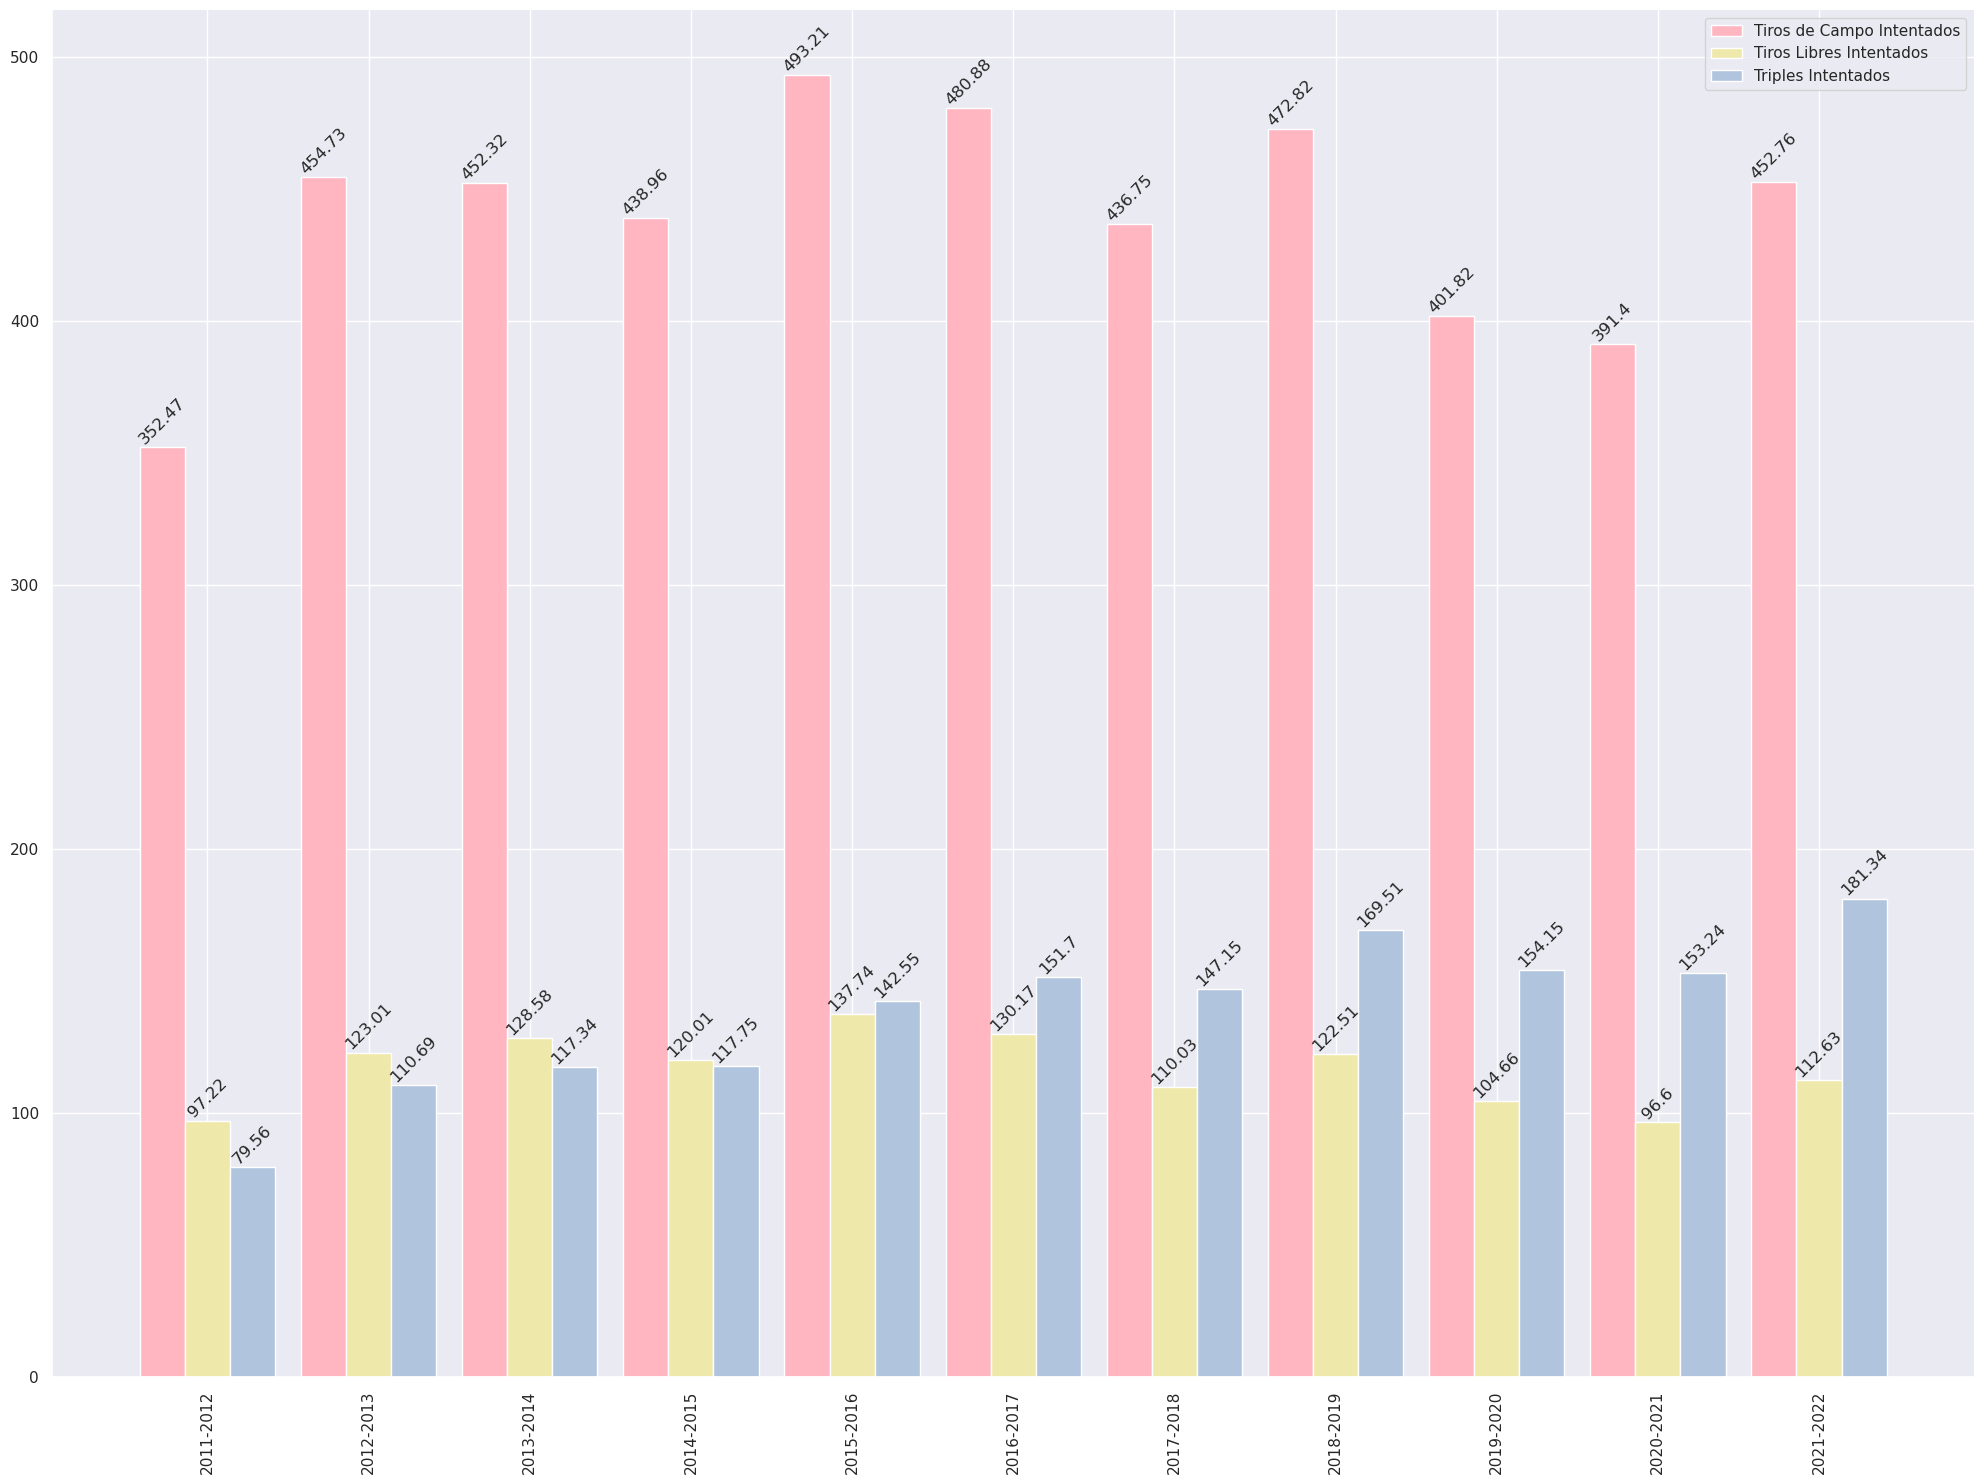

In [139]:
# Visualización - Tiros intentados
 
fig, ax = plt.subplots(figsize = (20, 15)) 

bar_width = 0.28

x = np.arange(mean_intentados.index.size) 

bar_campo = ax.bar(x - bar_width, mean_intentados['tci_total'], bar_width, label = 'Tiros de Campo Intentados', color = 'lightpink')
bar_libres = ax.bar(x, mean_intentados['tli_total'], bar_width, label = 'Tiros Libres Intentados', color = 'palegoldenrod')
bar_triple = ax.bar(x + bar_width, mean_intentados['tti_total'], bar_width, label = 'Triples Intentados', color = 'lightsteelblue')


ax.set_xticks(x)
ax.set_xticklabels(mean_intentados.index, rotation = 90);
ax.legend();


ax.bar_label(bar_campo, rotation = 45)
ax.bar_label(bar_libres, rotation = 45)
ax.bar_label(bar_triple, rotation = 45);

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

fig.tight_layout()

In [140]:
# Media de tiros encestados

temp_tiros = round((df_nba.groupby(df_nba['temporada']).mean()), 2)
mean_tiros_1 = temp_tiros.loc[:, ['tce_total', 'tle_total', 'tte_total']]

# Se elimina la temporada actual porque están en mitad de la misma y los datos de la misma aparecerían como outliers

mean_encestados = mean_tiros_1.loc[mean_tiros_1.index != '2022-2023']
mean_encestados

,tce_total,tle_total,tte_total
temporada,,,
2011-2012,157.92,73.17,27.76
2012-2013,205.93,92.62,39.72
2013-2014,205.58,97.23,42.21
2014-2015,197.12,90.04,41.22
2015-2016,223.77,104.61,50.79
2016-2017,220.23,100.59,54.35
2017-2018,201.05,84.40,53.26
2018-2019,217.93,93.94,60.28
2019-2020,185.08,80.93,55.24


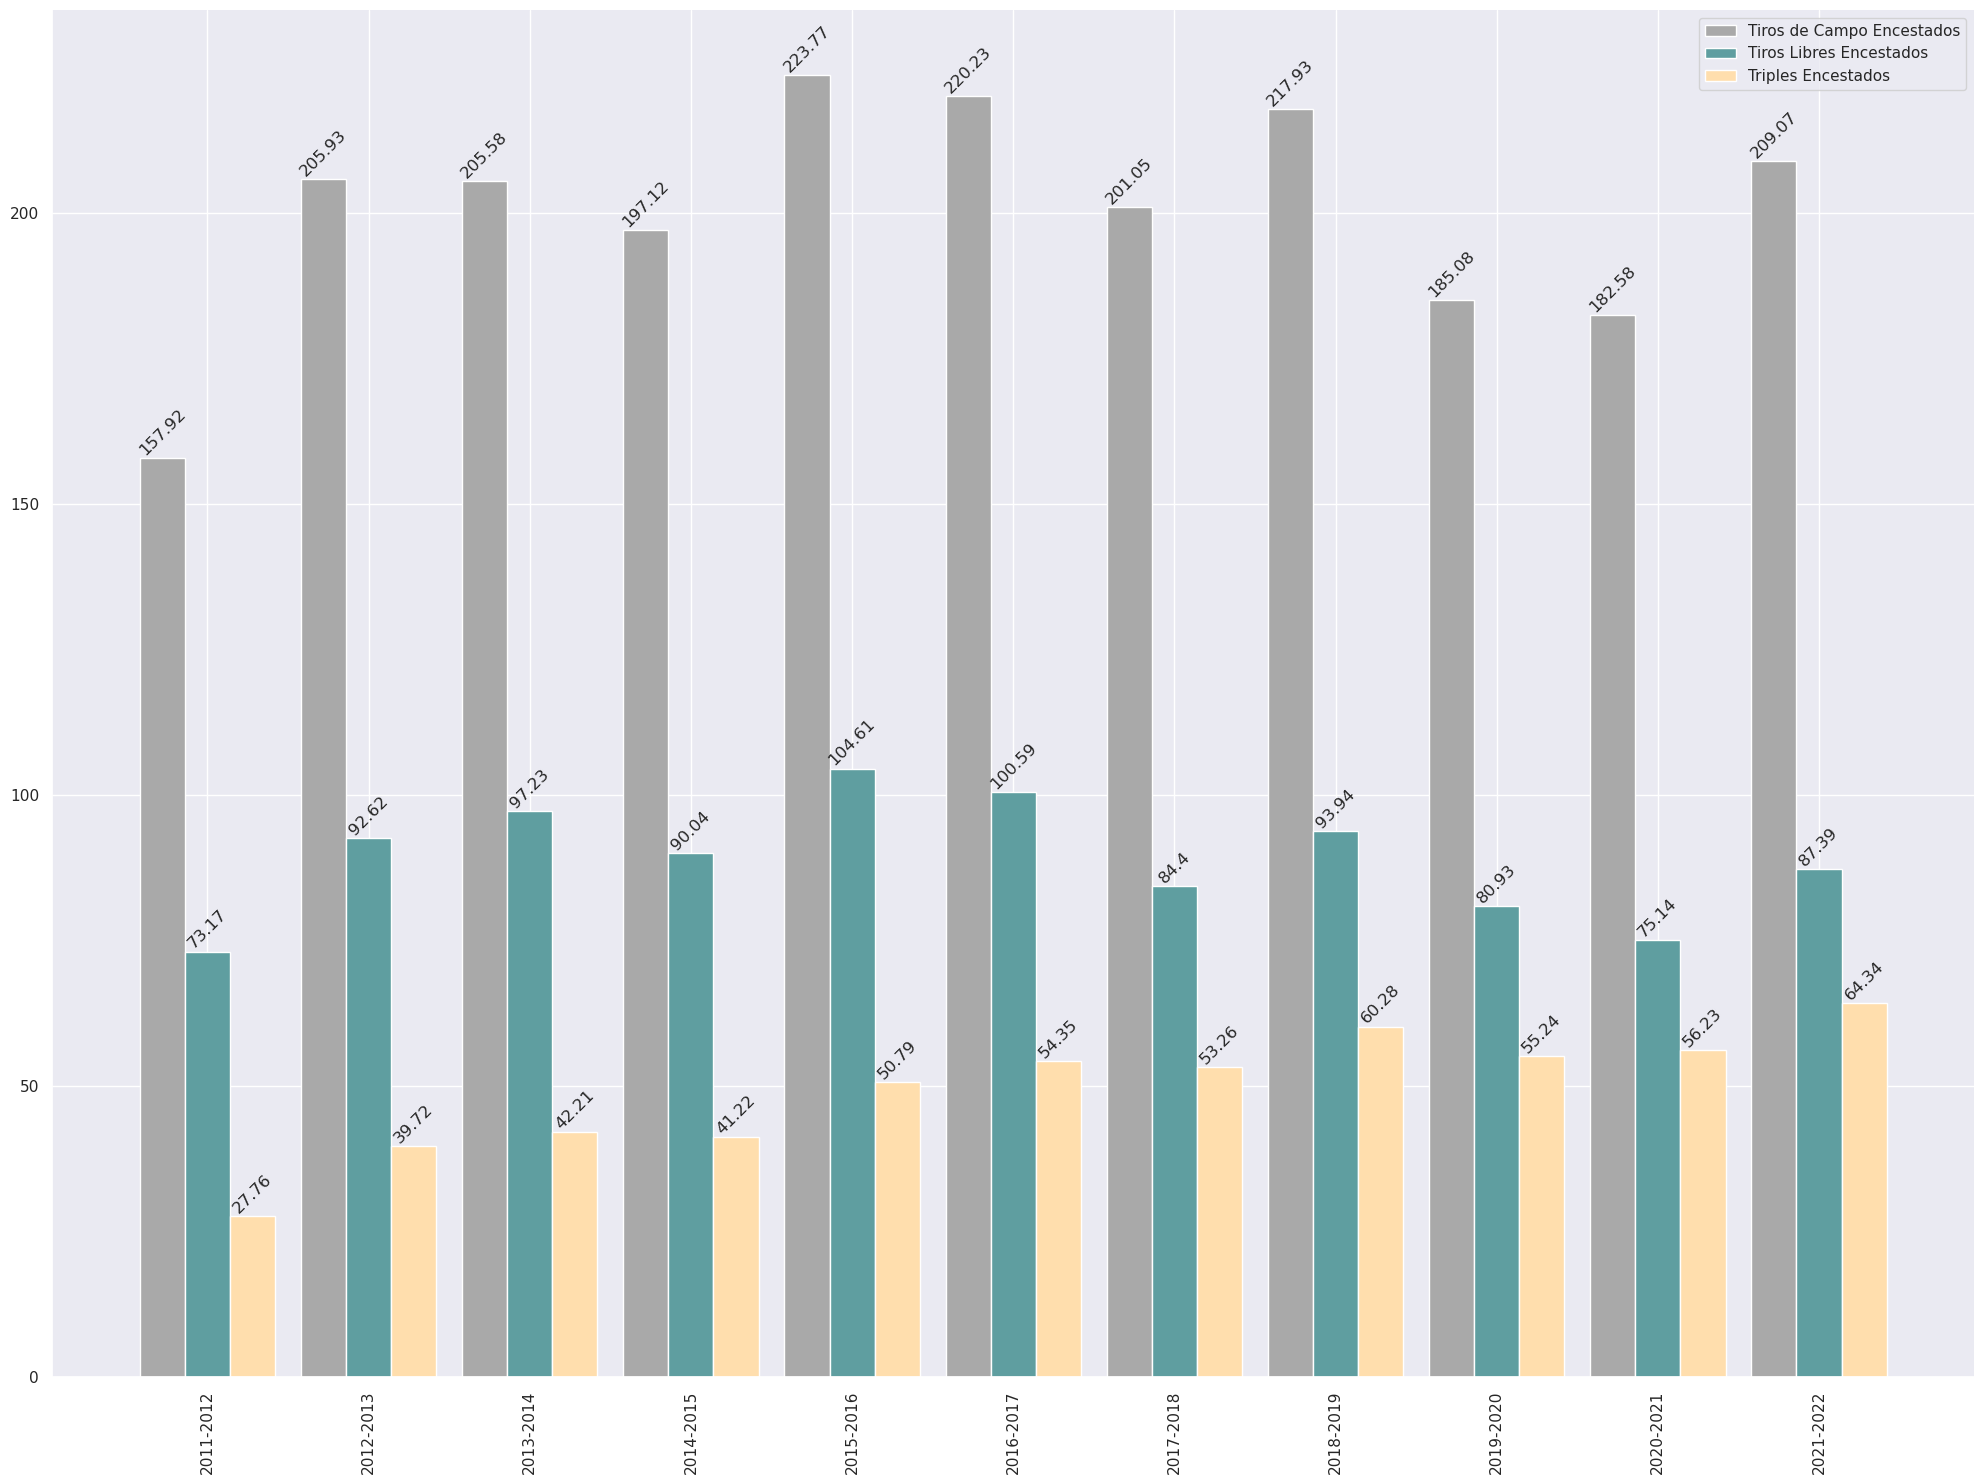

In [141]:
# Visualización - Tiros encestados por temporada

fig, ax = plt.subplots(figsize = (20, 15))

bar_width = 0.28

x = np.arange(mean_encestados.index.size) 


bar_campo = ax.bar(x - bar_width, mean_encestados['tce_total'], bar_width, label = 'Tiros de Campo Encestados', color = 'darkgrey')
bar_libres = ax.bar(x, mean_encestados['tle_total'], bar_width, label = 'Tiros Libres Encestados', color = 'cadetblue')
bar_triple = ax.bar(x + bar_width, mean_encestados['tte_total'], bar_width, label = 'Triples Encestados', color = 'navajowhite')


ax.set_xticks(x)
ax.set_xticklabels(mean_encestados.index, rotation = 90);
ax.legend();


ax.bar_label(bar_campo, rotation = 45)
ax.bar_label(bar_libres, rotation = 45)
ax.bar_label(bar_triple, rotation = 45);

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

fig.tight_layout()

In [142]:
# Eficiencia de tiro

temp_eficiencia = round((df_nba.groupby(df_nba['temporada']).mean()), 2)
eficiencia_data = temp_eficiencia.loc[:, ['eficiencia_tiro_total']]

# Se elomina la temporada actual porque están en mitad de la misma y no se podría comparar con el total del resto
eficiencia_temp = eficiencia_data.loc[eficiencia_data.index != '2022-2023']
eficiencia_temp

,eficiencia_tiro_total
temporada,
2011-2012,9.13
2012-2013,9.43
2013-2014,9.58
2014-2015,9.46
2015-2016,10.35
2016-2017,10.29
2017-2018,10.00
2018-2019,10.79
2019-2020,10.88


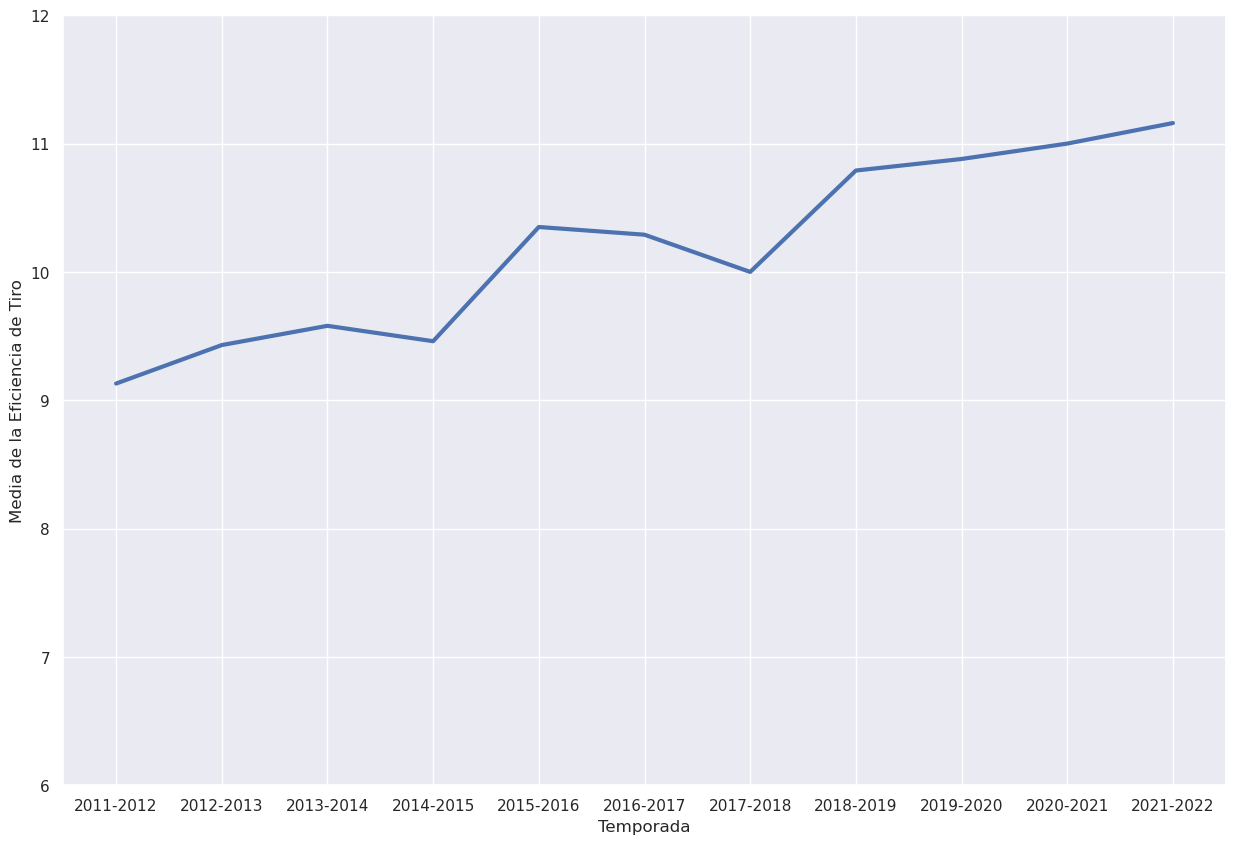

In [143]:
# Visualización - Media de eficiencia de tiro por temporada

plt.figure(figsize = (15, 10))

eficiency = sns.lineplot(data = eficiencia_temp,
                         x = eficiencia_temp.index,
                         y = eficiencia_temp.eficiencia_tiro_total,
                         linewidth = 3);

eficiency.set_ylim(6,12, 1)
eficiency.set(xlabel = 'Temporada', ylabel = 'Media de la Eficiencia de Tiro');